# SentirEs: Spanish Sensorimotor Norms 

In this code you will find the stimuli selection process for this project using the folowing steps:
1. Loading the database from Lynott and Connell (2020) study, _Lancaster Sensorimotor Norms_
2. Organizing dataset in decending order
   - Stimuli Selection: Highly Visual and Highly Haptic word categories
3. Masks
   - Stimuli Selection: Balanced and non-Salient word categories
4. Word catagory concatination
5. Stimuli visualization graphs
6. Data anlysis
   - Euclidean Distance
   - Cosine Similarity
7. Saving files

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns #loading the dataset

from sklearn.metrics.pairwise import cosine_similarity

from scipy.linalg import norm
from scipy.spatial.distance import cdist  
import scipy.stats as stats
from scipy.stats import wilcoxon
from scipy.stats import chi2_contingency


from math import sqrt
from math import acos, degrees

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

import glob
import os

# 1. Loads the database *Sensorimotor_norms_29Jan2024.csv*

**Lacaster_norms** returns all the data from the Lancaster Sensorimotor Norm data from Lynott and Connell (2020)

In [2]:
#loading dataset
Lancaster_norms = "Sensorimotor_norms_29Jan2024.csv"
Lancaster_norms = pd.read_csv(Lancaster_norms, sep=",")
Lancaster_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,Foot_leg.mean,Hand_arm.mean,Head.mean,...,Max_strength.sensorimotor,Exclusivity.sensorimotor,Dominant.sensorimotor,Minkowski3.perceptual,Minkowski3.action,Minkowski3.sensorimotor,N_known.perceptual,Percent_known.perceptual,N_known.action,Percent_known.action
0,A,2.214,0.000,0.429,0.000,0.000,2.429,0.000,0.357,1.071,...,2.429,0.354,Visual,2.934,1.097,2.984,14,0.737,14,0.667
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,0.381,0.429,2.714,...,4.333,0.285,Auditory,4.421,4.167,5.415,18,0.947,21,1.000
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,0.176,0.706,2.235,...,4.125,0.326,Visual,4.325,2.259,4.521,16,0.889,17,0.850
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,0.000,0.000,3.273,...,3.273,0.339,Head,3.007,3.274,3.964,17,0.850,11,0.579
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,0.000,2.474,2.632,...,3.944,0.263,Visual,4.887,3.219,5.314,18,0.947,19,0.905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,1.263,1.474,2.632,...,3.800,0.289,Visual,3.840,2.914,4.333,20,1.000,19,1.000
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,0.300,1.650,3.150,...,3.789,0.349,Visual,3.793,3.296,4.488,19,1.000,20,1.000
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,0.053,1.789,3.421,...,3.444,0.310,Visual,3.488,3.578,4.452,18,1.000,19,1.000
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,0.800,0.800,2.267,...,3.071,0.186,Visual,3.955,2.392,4.227,14,0.778,15,0.750


> The value of these words are an average from a Linkert scale that the participants used to self report there daily relationship the words using the 11 dimentions during the orginal survey

> 0 being the least prominant and 5 being the most 

#### Returns the newly assigned dataframe _sensory_dimentions_norms_ 

In [3]:
#selecting columns
column=["Word","Auditory.mean","Gustatory.mean","Haptic.mean","Interoceptive.mean","Olfactory.mean","Visual.mean"]
sensory_dimentions_norms=pd.DataFrame(Lancaster_norms,columns=column)
sensory_dimentions_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
0,A,2.214,0.000,0.429,0.000,0.000,2.429
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944
...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071


# 2. Organizing dataset in decending order

#### Returns the dataframe in order of highest to lowest VISUAL ranking

In [4]:
#sorting
visual_sorted=sensory_dimentions_norms.sort_values(by= ["Visual.mean"],ascending=False)
visual_sorted

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
30856,SIDE VIEW,0.000,0.000,0.000,0.529,0.000,5.000
3976,BRIGHTNESS,0.235,0.235,0.176,0.824,0.176,5.000
2394,BAR CODE,0.176,0.000,0.529,0.000,0.000,5.000
30096,SEE,0.056,0.000,0.000,0.333,0.000,5.000
26376,PRETTY,0.800,0.100,0.150,1.100,0.600,5.000
...,...,...,...,...,...,...,...
1611,AROMA,0.158,0.474,0.000,0.421,4.895,0.053
21939,MONOXIDE,0.235,0.000,0.000,1.471,0.941,0.000
34959,TONELESSLY,3.611,0.000,0.000,0.222,0.000,0.000
1952,AUDIBILITY,4.125,0.000,0.062,0.312,0.000,0.000


#### Returns the dataframe in order of highest to lowest HAPTIC ranking

In [5]:
#sorting
haptic_sorted = sensory_dimentions_norms.sort_values(by = ["Haptic.mean"],ascending=False)
haptic_sorted

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
15458,HANDSHAKE,0.000,0.00,4.944,0.444,0.0,3.667
26413,PRICKLY,0.133,0.20,4.933,1.867,0.2,3.267
25345,PILLOW,0.529,0.00,4.882,1.529,1.0,4.706
35066,TOUCH,0.562,0.00,4.875,1.312,0.0,2.625
35072,TOUCHING,0.200,0.05,4.850,1.950,0.0,1.700
...,...,...,...,...,...,...,...
16466,HOUSEMASTER,1.357,0.00,0.000,0.286,0.0,2.929
6741,CONSCIENCE,0.579,0.00,0.000,3.684,0.0,0.158
6738,CONQUEROR,1.833,0.00,0.000,0.278,0.0,2.389
35701,TWEET,2.722,0.00,0.000,0.278,0.0,3.722


# 3. Masks
> Masks are a form of focusing a datset on specific features without altering the orginal database.
> We used masks for our _Balanced_ and _Non-salient_ word categories
- We did this by highlighting applying the to 'Visual.mean' and 'Haptic.mean' columns to only return magnitides within 2-3 for _Balanced_ and 0-2 for the _Non-slaient_ word categories.
- We then removed any words that repeated between the lists. 

#### Returns words with a rating between 2 and 3 called *visual.mask*
- The _Balanced_ word category is used to collect data that we expect have high variability between partiipants

In [6]:
sensory_dimentions_norms['visual.mask']= sensory_dimentions_norms['Visual.mean'][(sensory_dimentions_norms['Visual.mean']<= 3)& (sensory_dimentions_norms['Visual.mean']>=2)] 
# mask created to select the sorted visual words that have a ranting between 2 and 3  
sensory_dimentions_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,visual.mask
0,A,2.214,0.000,0.429,0.000,0.000,2.429,2.429
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,NaN
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,NaN
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,2.824
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,NaN
...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,NaN
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,NaN
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,NaN
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,NaN


#### Returns words with a rating between 2 and 3 called *haptic.mask*

In [7]:
sensory_dimentions_norms['haptic.mask']= sensory_dimentions_norms['Haptic.mean'][(sensory_dimentions_norms['Haptic.mean']<= 3)& (sensory_dimentions_norms['Haptic.mean']>=2)]
# mask created to select the sorted visual words that have a ranting between 2 and 3  
sensory_dimentions_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,visual.mask,haptic.mask
0,A,2.214,0.000,0.429,0.000,0.000,2.429,2.429,NaN
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,NaN,NaN
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,NaN,NaN
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,2.824,NaN
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,NaN,NaN
...,...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,NaN,NaN
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,NaN,NaN
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,NaN,NaN
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,NaN,NaN


#### Removing data that is not between 2 and 3 ranking for visual and haptic masked columns

In [8]:
sensory_dimentions_norms = sensory_dimentions_norms.dropna()

In [9]:
visual_haptic_sample = sensory_dimentions_norms.sample(200)
dimensions = list(visual_haptic_sample.columns.values)
dimensions = dimensions[0:7] # 'Word' - 'Visual.mean'
visual_haptic_sample = visual_haptic_sample[dimensions]
visual_haptic_sample

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
38819,WETLY,1.941,0.706,2.765,1.294,1.176,2.412
11320,ENSNARE,0.769,0.077,2.615,1.000,0.154,3.000
38231,VISCOUSLY,1.737,0.789,2.105,1.158,0.316,2.684
4012,BROADLEAF,0.533,0.800,2.067,0.133,0.667,2.933
25647,PLUNGE,1.312,0.062,2.125,1.875,0.125,2.188
...,...,...,...,...,...,...,...
23422,OBTAIN,0.895,0.474,2.526,0.684,0.263,2.789
3933,BREEZY,2.632,0.105,2.947,1.368,0.632,2.316
38605,WATERLOG,0.889,0.389,2.500,1.167,0.222,2.833
38763,WEIGHTINESS,0.316,0.000,2.526,1.316,0.000,2.579


## Non-salient word catergory ##

- The _Non-salient_ word category is used to collect data that are not visually or hapticly oriented to ensure balanced partipant responces.

In [10]:
vh_norms=pd.DataFrame(Lancaster_norms,columns=column)
vh_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
0,A,2.214,0.000,0.429,0.000,0.000,2.429
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944
...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071


In [11]:
vh_norms['haptic.mask']= vh_norms['Visual.mean'][(vh_norms['Haptic.mean']<= 2)& (vh_norms['Visual.mean']<=2)]
# mask created to select the sorted visual words that have a ranting between 2 and 3  
vh_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,haptic.mask
0,A,2.214,0.000,0.429,0.000,0.000,2.429,NaN
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,1.667
2,AARDVARK,1.625,0.562,1.625,0.062,1.250,4.125,NaN
3,ABACK,1.294,0.059,0.294,1.353,0.000,2.824,NaN
4,ABACUS,1.556,0.167,3.722,0.278,0.111,3.944,NaN
...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050,0.000,0.400,0.800,0.000,3.800,NaN
39703,ZOOM IN,0.474,0.105,0.316,0.158,0.105,3.789,NaN
39704,ZOOM LENS,0.556,0.000,1.111,0.278,0.000,3.444,NaN
39705,ZOOPHOBIA,1.714,0.286,0.857,3.000,0.571,3.071,NaN


In [12]:
vh_norms=vh_norms.dropna()
vh_norms

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,haptic.mask
1,A CAPPELLA,4.333,0.000,0.222,0.722,0.000,1.667,1.667
17,ABDOMINALLY,0.412,0.471,0.882,2.059,0.176,1.353,1.353
22,ABHOR,1.696,0.000,0.174,2.087,0.174,1.783,1.783
23,ABHORRENCE,1.312,0.188,0.500,2.750,0.438,1.500,1.500
25,ABHORRING,1.000,0.200,0.000,3.200,0.200,1.400,1.400
...,...,...,...,...,...,...,...,...
39669,ZESTFULNESS,1.235,1.941,0.529,2.059,1.529,1.941,1.941
39670,ZESTY,0.263,3.737,0.263,1.632,2.263,0.842,0.842
39676,ZINC,0.100,1.150,0.800,0.450,0.350,1.950,1.950
39678,ZING,2.812,0.438,0.875,1.125,0.062,1.625,1.625


# 4. Word catagory concatination

In [13]:
np.random.seed(8)

In [14]:
vh_norm_sample = vh_norms.sample(200)
dimensions = list(vh_norm_sample.columns.values)
dimensions = dimensions[0:7] # 'Word' - 'Visual.mean'
vh_norm_sample = vh_norm_sample[dimensions]
vh_norm_sample

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
24468,PARAPSYCHOLOGY,2.278,0.333,0.500,0.833,0.500,1.778
18550,INTUITIONALLY,1.286,0.214,0.429,2.357,0.286,0.929
38633,WAVERINGLY,1.083,0.000,0.000,0.583,0.000,2.000
11799,EXCRETIVE,0.364,0.000,0.091,1.000,1.000,1.455
15158,GUARDIAN ANGEL,0.632,0.000,0.000,1.737,0.000,1.263
...,...,...,...,...,...,...,...
4443,CALCULATIVE,0.833,0.000,0.000,1.333,0.000,1.222
15931,HEREIN,0.714,0.071,0.286,1.000,0.214,1.357
5374,CHLORINATE,0.125,1.000,0.625,0.250,3.062,1.438
17570,INDEPENDENTLY,1.059,0.529,0.471,1.824,0.412,2.000


In [15]:
vh_norm_sample  = vh_norm_sample.dropna()
vh_norm_sample

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
24468,PARAPSYCHOLOGY,2.278,0.333,0.500,0.833,0.500,1.778
18550,INTUITIONALLY,1.286,0.214,0.429,2.357,0.286,0.929
38633,WAVERINGLY,1.083,0.000,0.000,0.583,0.000,2.000
11799,EXCRETIVE,0.364,0.000,0.091,1.000,1.000,1.455
15158,GUARDIAN ANGEL,0.632,0.000,0.000,1.737,0.000,1.263
...,...,...,...,...,...,...,...
4443,CALCULATIVE,0.833,0.000,0.000,1.333,0.000,1.222
15931,HEREIN,0.714,0.071,0.286,1.000,0.214,1.357
5374,CHLORINATE,0.125,1.000,0.625,0.250,3.062,1.438
17570,INDEPENDENTLY,1.059,0.529,0.471,1.824,0.412,2.000


In [16]:
unique_df = vh_norm_sample.drop_duplicates(subset=['Word'])
unique_df 

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
24468,PARAPSYCHOLOGY,2.278,0.333,0.500,0.833,0.500,1.778
18550,INTUITIONALLY,1.286,0.214,0.429,2.357,0.286,0.929
38633,WAVERINGLY,1.083,0.000,0.000,0.583,0.000,2.000
11799,EXCRETIVE,0.364,0.000,0.091,1.000,1.000,1.455
15158,GUARDIAN ANGEL,0.632,0.000,0.000,1.737,0.000,1.263
...,...,...,...,...,...,...,...
4443,CALCULATIVE,0.833,0.000,0.000,1.333,0.000,1.222
15931,HEREIN,0.714,0.071,0.286,1.000,0.214,1.357
5374,CHLORINATE,0.125,1.000,0.625,0.250,3.062,1.438
17570,INDEPENDENTLY,1.059,0.529,0.471,1.824,0.412,2.000


#### Creating a random seed to ensure constistant results

In [17]:
np.random.seed(8)
# fixes the starting point of randomization
# 8 becuase its my favorite number!

#### Subselecting the a random 300 masked words between (2 and 3 values)

In [18]:
visual_haptic_sample = sensory_dimentions_norms.sample(200)
dimensions = list(visual_haptic_sample.columns.values)
dimensions = dimensions[0:7] # 'Word' - 'Visual.mean'
visual_haptic_sample = visual_haptic_sample[dimensions]
visual_haptic_sample

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
13240,FLUNG,0.800,0.000,2.400,0.450,0.000,2.900
28829,REWEAVE,0.133,0.000,2.067,0.067,0.067,2.600
36954,UNLOOSE,0.444,0.000,2.000,1.000,0.000,2.611
19318,KNOCKER,2.944,0.000,2.056,0.278,0.000,2.667
16681,HYMEN,0.176,0.000,2.294,1.471,0.000,2.412
...,...,...,...,...,...,...,...
24693,PAWING,1.381,0.095,2.952,0.905,0.095,2.714
36734,UNHAND,0.368,0.053,2.421,0.895,0.053,2.842
35600,TUGGING,0.562,0.000,2.312,1.312,0.188,2.000
22131,MOUTHFUL,1.188,3.188,2.000,2.562,0.625,2.375


# 5. Stimuli visualization graphs

#### Visual words and Sensorimotor Strength graph 
Returns a graph depicting all the visual words with a line indicting the 300 words with the lowest variance 

In [19]:
# indexing subset
visual_subset = visual_sorted.iloc[:300]
haptic_subset = haptic_sorted.iloc[:300]


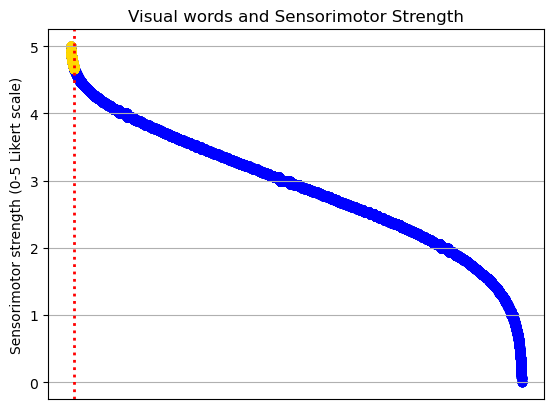

In [20]:
# defining x and y axis 
x1_data = visual_sorted["Word"]
y1_data = visual_sorted["Visual.mean"]

x2_data = visual_subset["Word"]
y2_data = visual_subset["Visual.mean"]

# defining the type of plot
#fig, ax = plt.subplots(1, 2)
fig, ax = plt.subplots()
ax.scatter(x1_data, y1_data)
ax.scatter(x2_data, y2_data)
#ax.plot(x1_data,x2_data, y1_data, y2_data)

# names of labels 
ax.set(xlabel = 'Visual words', ylabel='Sensorimotor strength (0-5 Likert scale)',title = 'Visual words and Sensorimotor Strength')

#set x label to false becuase it tries to print all the words 
ax.get_xaxis().set_visible(False)

# show plot
ax.grid()
# add verticle line at 300
ax.scatter(x1_data, y1_data, label="Line 1", color='blue')
ax.scatter(x2_data, y2_data, label="Line 2", color='gold') 
ax.axvline(x = 300, color = 'red', linestyle = 'dotted', linewidth = 2)

#fig.savefig("test.png")
plt.show()

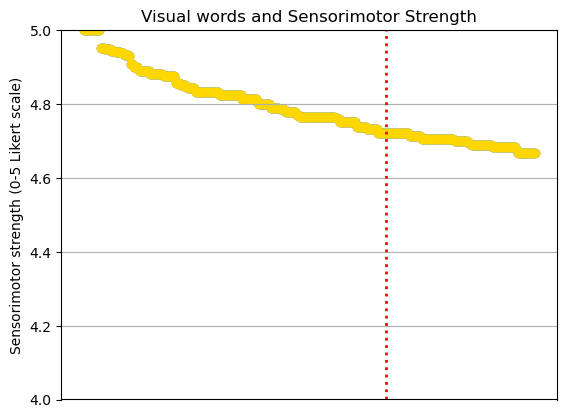

In [21]:
# defining x and y axis 
x2_data = visual_subset["Word"]
y2_data = visual_subset["Visual.mean"]

# defining the type of plot
fig, ax = plt.subplots()
ax.scatter(x2_data, y2_data)


# names of labels 
ax.set(xlabel = 'Visual words', ylabel='Sensorimotor strength (0-5 Likert scale)',title = 'Visual words and Sensorimotor Strength')

#set x label to false becuase it tries to print all the words 
ax.get_xaxis().set_visible(False)

# show plot
ax.grid()

# add verticle line at 300
ax.scatter(x2_data, y2_data, color='gold') 
ax.set_ylim(4, 5)
ax.axvline(x = 200, color = 'red', linestyle = 'dotted', linewidth = 2)

plt.show()

#### Haptic words and Senorimotor Strength graph
Returns a graph depicting all the haptic words with a line indicting the 500 words with the lowest variance 

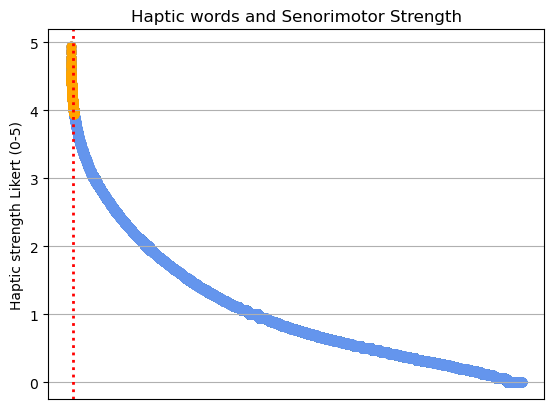

In [22]:
# defining x and y axis 
x3_data = haptic_sorted["Word"]
y3_data = haptic_sorted["Haptic.mean"]

x4_data = haptic_subset["Word"]
y4_data = haptic_subset["Haptic.mean"]

#defining the type of plot
fig, ax = plt.subplots()
ax.scatter(x3_data, y3_data)
ax.scatter(x4_data, y4_data)


#labling x and y axis 
ax.set(xlabel = 'Haptic Words', ylabel='Haptic strength Likert (0-5)', title = 'Haptic words and Senorimotor Strength')

#set x label to false becuase it tries to print all the words 
ax.get_xaxis().set_visible(False)

# show plot
ax.grid()

# add verticle line
ax.scatter(x3_data, y3_data, color='cornflowerblue') 
ax.scatter(x4_data, y4_data, color='orange') 
ax.axvline(x = 200, color = 'red', linestyle = 'dotted', linewidth = 2)
# add verticle line at 300
plt.show()

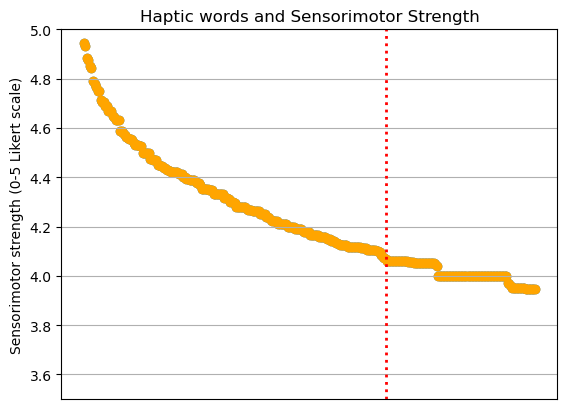

In [23]:
# defining x and y axis 
x4_data = haptic_subset["Word"]
y4_data = haptic_subset["Haptic.mean"]

# defining the type of plot
fig, ax = plt.subplots()
ax.scatter(x4_data, y4_data)

# names of labels 
ax.set(xlabel = 'Haptic words', ylabel='Sensorimotor strength (0-5 Likert scale)',title = 'Haptic words and Sensorimotor Strength')

#set x label to false becuase it tries to print all the words 
ax.get_xaxis().set_visible(False)


# show plot
ax.grid()

# add verticle line at 300
ax.set_ylim(3.5, 5)
ax.scatter(x4_data, y4_data, color='orange') 
ax.axvline(x = 200, color = 'red', linestyle = 'dotted', linewidth = 2)

#fig.savefig("test.png")
plt.show()


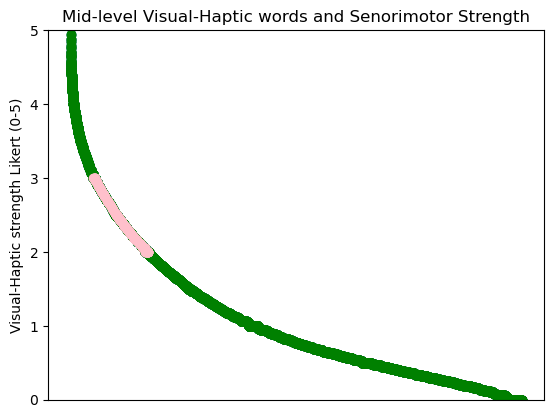

In [24]:
# make the data
x5_data = haptic_sorted["Word"]
y5_data = haptic_sorted["Haptic.mean"]

x6_data = visual_haptic_sample["Word"]
y6_data = visual_haptic_sample["Haptic.mean"]

# plot
fig, ax = plt.subplots()
ax.scatter(x5_data, y5_data)
ax.scatter(x6_data, y6_data)


ax.get_xaxis().set_visible(False)
ax.set(xlabel = 'Mid-level Visuohaptic Words', ylabel='Visual-Haptic strength Likert (0-5)', title ='Mid-level Visual-Haptic words and Senorimotor Strength')


ax.scatter(x5_data, y5_data, color='green')
ax.scatter(x6_data, y6_data, color='pink') 
ax.set_ylim(0, 5)
plt.show()

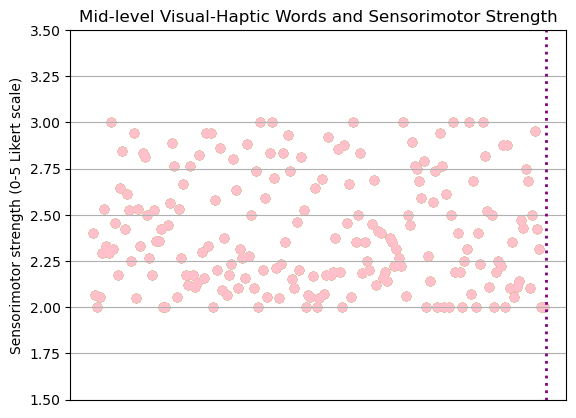

In [25]:
# defining x and y axis 
x6_data = visual_haptic_sample["Word"]
y6_data = visual_haptic_sample["Haptic.mean"]

# defining the type of plot
fig, ax = plt.subplots()
ax.scatter(x6_data, y6_data)

# names of labels 
ax.set(xlabel = 'Mid-level Visual-Haptic Words', ylabel='Sensorimotor strength (0-5 Likert scale)',title = 'Mid-level Visual-Haptic Words and Sensorimotor Strength')

#set x label to false becuase it tries to print all the words 
ax.get_xaxis().set_visible(False)

# show plot
ax.grid()
ax.scatter(x6_data, y6_data, color='orange') 
# add verticle line at 300

ax.set_ylim(1.5,3.5)
ax.scatter(x6_data, y6_data, color='pink') 
ax.axvline(x = 200, color = 'purple', linestyle = 'dotted', linewidth = 2)

#fig.savefig("test.png")
plt.show()

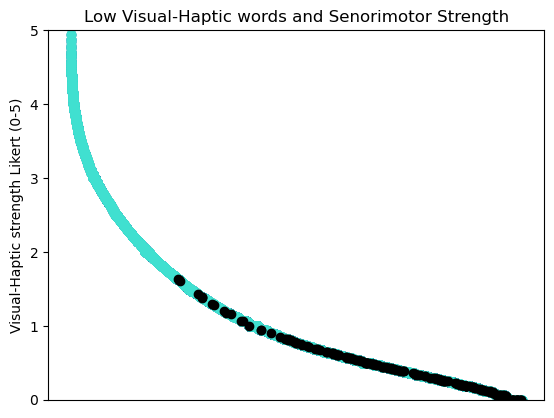

In [26]:
# make the data
x7_data = haptic_sorted["Word"]
y7_data = haptic_sorted["Haptic.mean"]


x8_data = vh_norm_sample["Word"]
y8_data = vh_norm_sample["Haptic.mean"]
# plot
fig, ax = plt.subplots()
ax.scatter(x7_data, y7_data)
ax.scatter(x8_data, y8_data)


ax.get_xaxis().set_visible(False)
ax.set(xlabel = 'Low Visual-Haptic Words', ylabel='Visual-Haptic strength Likert (0-5)', title ='Low Visual-Haptic words and Senorimotor Strength')



ax.scatter(x7_data, y7_data, color='turquoise')
ax.scatter(x8_data, y8_data, color='black') 
ax.set_ylim(0, 5)
plt.axhline(y=200, color='red', linestyle='dotted')

plt.show()

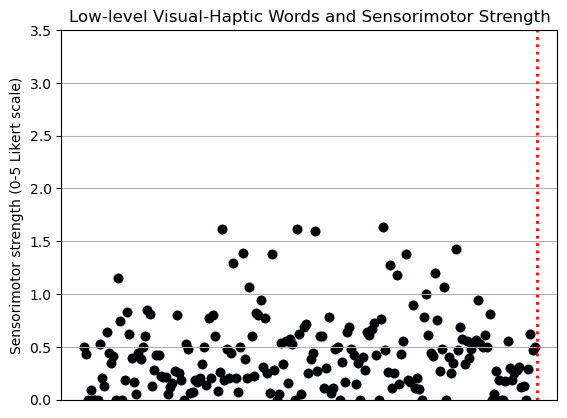

In [27]:
# defining x and y axis 
x8_data = vh_norm_sample["Word"]
y8_data = vh_norm_sample["Haptic.mean"]

# defining the type of plot
fig, ax = plt.subplots()
ax.scatter(x8_data, y8_data)

# names of labels 
ax.set(xlabel = 'Mid-level Visual-Haptic Words', ylabel='Sensorimotor strength (0-5 Likert scale)',title = 'Low-level Visual-Haptic Words and Sensorimotor Strength')

#set x label to false becuase it tries to print all the words 
ax.get_xaxis().set_visible(False)

# show plot
ax.grid()
ax.scatter(x8_data, y8_data, color='black') 
# add verticle line at 300

ax.set_ylim(0,3.5)
ax.axvline(x = 200, color = 'red', linestyle = 'dotted', linewidth = 2)

#fig.savefig("test.png")
plt.show()

In [28]:
vh_norm_sample

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean
24468,PARAPSYCHOLOGY,2.278,0.333,0.500,0.833,0.500,1.778
18550,INTUITIONALLY,1.286,0.214,0.429,2.357,0.286,0.929
38633,WAVERINGLY,1.083,0.000,0.000,0.583,0.000,2.000
11799,EXCRETIVE,0.364,0.000,0.091,1.000,1.000,1.455
15158,GUARDIAN ANGEL,0.632,0.000,0.000,1.737,0.000,1.263
...,...,...,...,...,...,...,...
4443,CALCULATIVE,0.833,0.000,0.000,1.333,0.000,1.222
15931,HEREIN,0.714,0.071,0.286,1.000,0.214,1.357
5374,CHLORINATE,0.125,1.000,0.625,0.250,3.062,1.438
17570,INDEPENDENTLY,1.059,0.529,0.471,1.824,0.412,2.000


In [29]:
haptic_subset = haptic_subset[haptic_subset['Visual.mean'] <= 4]
haptic_subset = haptic_subset.iloc[:200]

In [30]:
# create new dataframe for the visual subset
visual_subset_df = pd.DataFrame(visual_subset)
# set it to a new column called 'mixed'
visual_subset_df['mixed'] = 'visual' 


# create a new dataframe for the haptic subset
haptic_subset_df = pd.DataFrame(haptic_subset)
# set it to a new coumn called 'mixed'
haptic_subset_df['mixed'] = 'haptic'

# create new dataframe for the visuohaptic low subset
vh_norms_low_subset_df = pd.DataFrame(vh_norm_sample)
# set it to a new column called 'mixed'
vh_norms_low_subset_df['mixed'] = 'vh_low'

# create new dataframe for the visuohaptic medium subset
vh_norm_med_subset_df = pd.DataFrame(visual_haptic_sample)
# set it to a new column called 'mixed'
vh_norm_med_subset_df['mixed'] = 'vh_med'


# use the .concat function to combine the visual and haptic dataframes together to make 1 single new column
combined_visual_haptic_df = pd.concat([visual_subset_df, haptic_subset_df, vh_norms_low_subset_df, vh_norm_med_subset_df], ignore_index=True)
combined_visual_haptic_df

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,mixed
0,SIDE VIEW,0.000,0.000,0.000,0.529,0.000,5.000,visual
1,BRIGHTNESS,0.235,0.235,0.176,0.824,0.176,5.000,visual
2,BAR CODE,0.176,0.000,0.529,0.000,0.000,5.000,visual
3,SEE,0.056,0.000,0.000,0.333,0.000,5.000,visual
4,PRETTY,0.800,0.100,0.150,1.100,0.600,5.000,visual
...,...,...,...,...,...,...,...,...
895,PAWING,1.381,0.095,2.952,0.905,0.095,2.714,vh_med
896,UNHAND,0.368,0.053,2.421,0.895,0.053,2.842,vh_med
897,TUGGING,0.562,0.000,2.312,1.312,0.188,2.000,vh_med
898,MOUTHFUL,1.188,3.188,2.000,2.562,0.625,2.375,vh_med


In [31]:
# .dropduplicates removes the repeated words in the 'mixed' column
unique_df = combined_visual_haptic_df.drop_duplicates(subset=['Word'])
unique_df 

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,mixed
0,SIDE VIEW,0.000,0.000,0.000,0.529,0.000,5.000,visual
1,BRIGHTNESS,0.235,0.235,0.176,0.824,0.176,5.000,visual
2,BAR CODE,0.176,0.000,0.529,0.000,0.000,5.000,visual
3,SEE,0.056,0.000,0.000,0.333,0.000,5.000,visual
4,PRETTY,0.800,0.100,0.150,1.100,0.600,5.000,visual
...,...,...,...,...,...,...,...,...
895,PAWING,1.381,0.095,2.952,0.905,0.095,2.714,vh_med
896,UNHAND,0.368,0.053,2.421,0.895,0.053,2.842,vh_med
897,TUGGING,0.562,0.000,2.312,1.312,0.188,2.000,vh_med
898,MOUTHFUL,1.188,3.188,2.000,2.562,0.625,2.375,vh_med


In [32]:
subset_1 = unique_df.iloc[:400]
subset_1

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,mixed
0,SIDE VIEW,0.000,0.000,0.000,0.529,0.000,5.000,visual
1,BRIGHTNESS,0.235,0.235,0.176,0.824,0.176,5.000,visual
2,BAR CODE,0.176,0.000,0.529,0.000,0.000,5.000,visual
3,SEE,0.056,0.000,0.000,0.333,0.000,5.000,visual
4,PRETTY,0.800,0.100,0.150,1.100,0.600,5.000,visual
...,...,...,...,...,...,...,...,...
395,JOYSTICK,0.684,0.158,4.211,0.105,0.105,3.947,haptic
396,SHAKING HANDS,0.053,0.000,4.211,1.526,0.000,2.632,haptic
397,FELT,0.316,0.263,4.211,1.368,0.105,1.895,haptic
398,KNEADING,0.733,0.400,4.200,1.133,0.800,3.133,haptic


In [33]:
subset_2 = unique_df.iloc[500:]
subset_2

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,mixed
500,PARAPSYCHOLOGY,2.278,0.333,0.500,0.833,0.500,1.778,vh_low
501,INTUITIONALLY,1.286,0.214,0.429,2.357,0.286,0.929,vh_low
502,WAVERINGLY,1.083,0.000,0.000,0.583,0.000,2.000,vh_low
503,EXCRETIVE,0.364,0.000,0.091,1.000,1.000,1.455,vh_low
504,GUARDIAN ANGEL,0.632,0.000,0.000,1.737,0.000,1.263,vh_low
...,...,...,...,...,...,...,...,...
895,PAWING,1.381,0.095,2.952,0.905,0.095,2.714,vh_med
896,UNHAND,0.368,0.053,2.421,0.895,0.053,2.842,vh_med
897,TUGGING,0.562,0.000,2.312,1.312,0.188,2.000,vh_med
898,MOUTHFUL,1.188,3.188,2.000,2.562,0.625,2.375,vh_med


In [34]:
dimensions = list(unique_df.columns.values)
dimension_analysis = dimensions[1:7]
dimension_analysis

['Auditory.mean',
 'Gustatory.mean',
 'Haptic.mean',
 'Interoceptive.mean',
 'Olfactory.mean',
 'Visual.mean']

#### Plotting the combined dataframe *_Balanced_* levels
We are plotting seperatly the words that are unquly visual and unquly haptic and camparing them to the other columns. This is so the researchers can see that the amount of word in either column have low variance compared to ther

#### Returns a plot with all the modalities **and** the most highly ranked VISUAL words

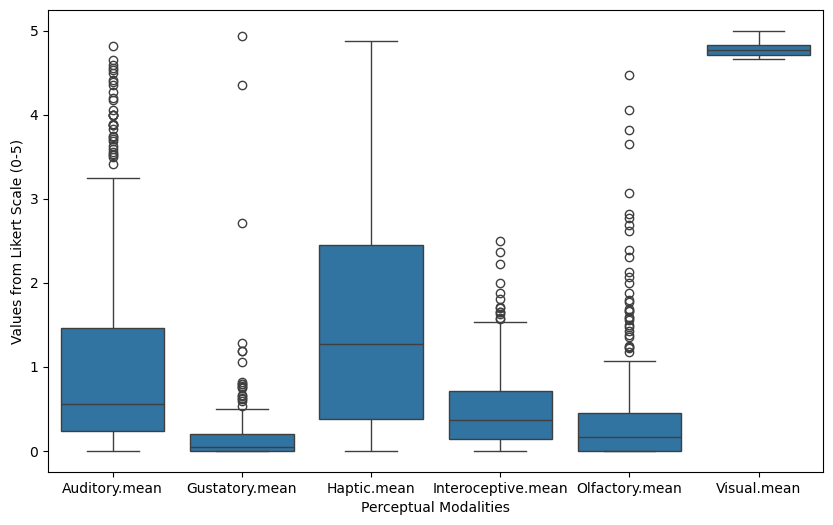

In [35]:
# set the unique visual dataframe to the mixed column
# within the mixed column find the words labeled visual
unique_df_visual = unique_df[unique_df['mixed'] == 'visual']

# define the columns we want in the plot
dimensions = list(unique_df_visual.columns.values)
dimensions = dimensions[1:7] # 'Words' - 'Visual.mean'



# set plot = the unique visual dataframe
data_to_plot = unique_df_visual[dimensions]

#resize the plot
plt.figure(figsize=(10, 6))

# label the plot
sns.boxplot(x ='variable', y = 'value', data = pd.melt(data_to_plot))
plt.ylabel('Values from Likert Scale (0-5)')
plt.xlabel('Perceptual Modalities')

plt.show()

#### Returns a plot with all the Perceptual Modalities **and** the uniquly haptic words

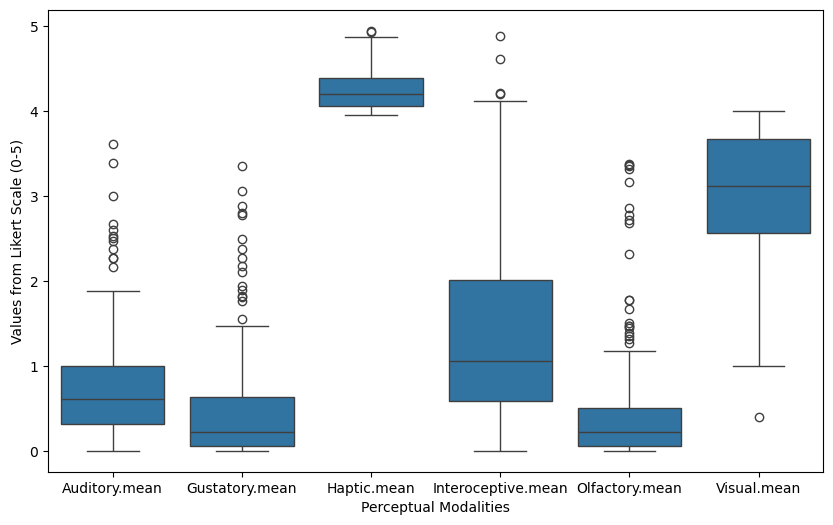

In [36]:
# set the unique haptic dataframe to the mixed column
# within the mixed column find the words labeled 'haptic' 
unique_df_haptic = unique_df[unique_df['mixed'] == 'haptic']

## define the columns we want in the plot 
dimensions = list(unique_df_haptic.columns.values)
dimensions = dimensions[1:7] # 'Word' - 'Visual.mean'


# set plot = the unique haptic dataframe
data_to_plot = unique_df_haptic[dimensions]

#resize the plot
plt.figure(figsize=(10, 6))

# label the plot
sns.boxplot(x ='variable', y = 'value', data = pd.melt(data_to_plot))
plt.ylabel('Values from Likert Scale (0-5)')
plt.xlabel('Perceptual Modalities')

plt.show()

In [37]:
# define the columns we want in the plot 
dimensions = list(visual_haptic_sample.columns.values)
#visual_haptic_sample = visual_haptic_sample[:400]
visual_haptic_sample['mixed'] = 'combined'
visual_haptic_sample

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,mixed
13240,FLUNG,0.800,0.000,2.400,0.450,0.000,2.900,combined
28829,REWEAVE,0.133,0.000,2.067,0.067,0.067,2.600,combined
36954,UNLOOSE,0.444,0.000,2.000,1.000,0.000,2.611,combined
19318,KNOCKER,2.944,0.000,2.056,0.278,0.000,2.667,combined
16681,HYMEN,0.176,0.000,2.294,1.471,0.000,2.412,combined
...,...,...,...,...,...,...,...,...
24693,PAWING,1.381,0.095,2.952,0.905,0.095,2.714,combined
36734,UNHAND,0.368,0.053,2.421,0.895,0.053,2.842,combined
35600,TUGGING,0.562,0.000,2.312,1.312,0.188,2.000,combined
22131,MOUTHFUL,1.188,3.188,2.000,2.562,0.625,2.375,combined


#### Returns a plot with the visuohaptic words 

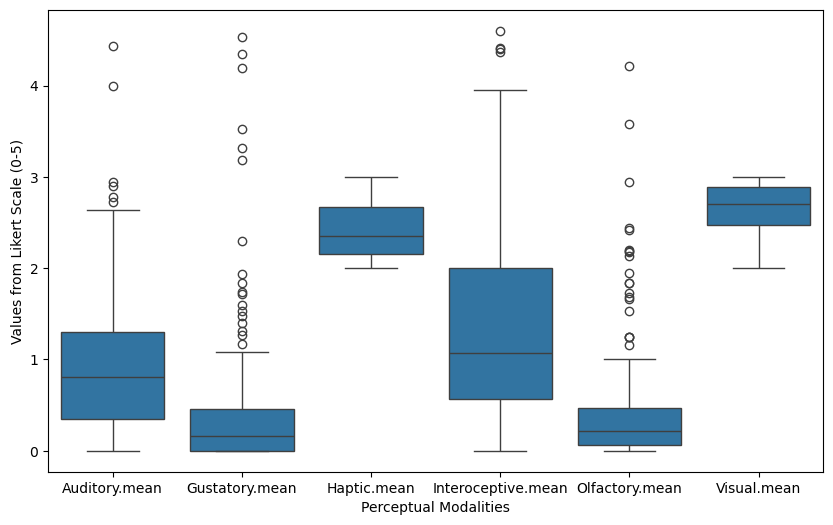

In [38]:
## define the columns we want in the plot 
dimensions = list(visual_haptic_sample.columns.values)
dimensions = dimensions[1:7] # 'Word' - 'Visual.mean'


# set plot = the unique haptic dataframe
data_to_plot = visual_haptic_sample[dimensions]

#resize the plot
plt.figure(figsize=(10, 6))

# label the plot
sns.boxplot(x ='variable', y = 'value', data = pd.melt(data_to_plot))
plt.ylabel('Values from Likert Scale (0-5)')
plt.xlabel('Perceptual Modalities')

plt.show()

# 6. Data anlysis

### Euclidean distance ###
* finds the distance between 2 points
* Calculate the squared difference between columns in the subsets
* square roots the squared differences


#### Euclidean distance with SentirEs and SentirENG

In [39]:
# Sentir data 
EUC_SentirES = pd.read_csv("SentirES_index.csv")
EUC_SentirES

,participant,PROLIFIC_PID,auditionslider.response,tasteslider.response,hapticslider.response,olfactionslider.response,visionslider.response,interoceptionsslider.response,nose2PAN.numClicks,Word,Category,Ave.numClicks,quinze.numClicks,manzana.numClicks,Index
0,5271,615b8628e36642dc441f4711,4.0,1.0,2.0,1.0,5.0,5.0,0.0,EMOCIONANTE,highly haptic,1,1,1,0
1,5271,615b8628e36642dc441f4711,2.0,4.0,4.0,4.0,4.0,0.0,0.0,CUAJAR,balanced,1,1,1,1
2,5271,615b8628e36642dc441f4711,4.0,5.0,1.0,2.0,5.0,3.0,0.0,DÍA,highly visual,1,1,1,2
3,5271,615b8628e36642dc441f4711,5.0,0.0,0.0,1.0,4.0,1.0,0.0,A LA VISTA,highly visual,1,1,1,3
4,5271,615b8628e36642dc441f4711,1.0,0.0,2.0,0.0,5.0,1.0,0.0,SOBRESCRIBIR,none,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,215625,5d45afeb62ed9000197adbb8,0.0,0.0,0.0,0.0,4.0,1.0,0.0,IMÁGENES,highly visual,1,1,1,75
1676,215625,5d45afeb62ed9000197adbb8,1.0,0.0,1.0,0.0,3.0,0.0,0.0,CONDUCTOR DE AUTOBÚS,highly visual,1,1,1,76
1677,215625,5d45afeb62ed9000197adbb8,0.0,0.0,0.0,0.0,3.0,0.0,0.0,MONUMENTO,highly visual,1,1,1,77
1678,215625,5d45afeb62ed9000197adbb8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,INFUNDADO,none,1,1,1,78


In [40]:
# select columns for equation, this one works
EUC_SentirES_cols=["Word","auditionslider.response", "tasteslider.response", "hapticslider.response", "olfactionslider.response", "visionslider.response", "interoceptionsslider.response","Category", "Index"]
EUC_SentirES_df=pd.DataFrame(EUC_SentirES,columns=EUC_SentirES_cols)
EUC_SentirES_df

,Word,auditionslider.response,tasteslider.response,hapticslider.response,olfactionslider.response,visionslider.response,interoceptionsslider.response,Category,Index
0,EMOCIONANTE,4.0,1.0,2.0,1.0,5.0,5.0,highly haptic,0
1,CUAJAR,2.0,4.0,4.0,4.0,4.0,0.0,balanced,1
2,DÍA,4.0,5.0,1.0,2.0,5.0,3.0,highly visual,2
3,A LA VISTA,5.0,0.0,0.0,1.0,4.0,1.0,highly visual,3
4,SOBRESCRIBIR,1.0,0.0,2.0,0.0,5.0,1.0,none,4
...,...,...,...,...,...,...,...,...,...
1675,IMÁGENES,0.0,0.0,0.0,0.0,4.0,1.0,highly visual,75
1676,CONDUCTOR DE AUTOBÚS,1.0,0.0,1.0,0.0,3.0,0.0,highly visual,76
1677,MONUMENTO,0.0,0.0,0.0,0.0,3.0,0.0,highly visual,77
1678,INFUNDADO,0.0,0.0,0.0,0.0,0.0,0.0,none,78


In [41]:
# select columns for equation, this one works
EUC_SentirES_med_cols=["Word","auditionslider.response", "tasteslider.response", "hapticslider.response", "olfactionslider.response", "visionslider.response", "interoceptionsslider.response"]
EUC_SentirES_med=pd.DataFrame(EUC_SentirES_df,columns=EUC_SentirES_med_cols)
EUC_SentirES_med

,Word,auditionslider.response,tasteslider.response,hapticslider.response,olfactionslider.response,visionslider.response,interoceptionsslider.response
0,EMOCIONANTE,4.0,1.0,2.0,1.0,5.0,5.0
1,CUAJAR,2.0,4.0,4.0,4.0,4.0,0.0
2,DÍA,4.0,5.0,1.0,2.0,5.0,3.0
3,A LA VISTA,5.0,0.0,0.0,1.0,4.0,1.0
4,SOBRESCRIBIR,1.0,0.0,2.0,0.0,5.0,1.0
...,...,...,...,...,...,...,...
1675,IMÁGENES,0.0,0.0,0.0,0.0,4.0,1.0
1676,CONDUCTOR DE AUTOBÚS,1.0,0.0,1.0,0.0,3.0,0.0
1677,MONUMENTO,0.0,0.0,0.0,0.0,3.0,0.0
1678,INFUNDADO,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
EUC_SentirENG_median=EUC_SentirES_med.groupby(["Word"]).median()
EUC_SentirENG_median

,auditionslider.response,tasteslider.response,hapticslider.response,olfactionslider.response,visionslider.response,interoceptionsslider.response
Word,,,,,,
A LA VISTA,1.5,0.0,0.0,0.5,5.0,1.0
ABRIGARSE,1.0,0.0,4.0,0.0,3.0,4.0
ACARICIADO,1.5,0.0,5.0,0.0,2.0,3.0
ACARICIAR,2.0,0.0,5.0,0.0,2.5,4.0
AFLOJAR,2.0,0.0,4.0,0.0,3.0,1.0
...,...,...,...,...,...,...
VISTA,2.0,0.0,0.0,0.0,5.0,1.0
VISTA LATERAL,1.0,0.0,0.0,0.0,5.0,0.5
WIKIPEDIA,1.0,0.0,0.0,0.0,5.0,0.0


In [43]:
EUC_SentirES_index_77 = EUC_SentirENG_median.iloc[:77]
EUC_SentirES_index_77

,auditionslider.response,tasteslider.response,hapticslider.response,olfactionslider.response,visionslider.response,interoceptionsslider.response
Word,,,,,,
A LA VISTA,1.5,0.0,0.0,0.5,5.0,1.0
ABRIGARSE,1.0,0.0,4.0,0.0,3.0,4.0
ACARICIADO,1.5,0.0,5.0,0.0,2.0,3.0
ACARICIAR,2.0,0.0,5.0,0.0,2.5,4.0
AFLOJAR,2.0,0.0,4.0,0.0,3.0,1.0
...,...,...,...,...,...,...
VER,0.5,0.0,0.0,0.0,5.0,1.5
VISIBLE,1.0,0.0,0.0,0.0,5.0,0.5
VISTA,2.0,0.0,0.0,0.0,5.0,1.0


In [44]:
EUC_SentirENG = pd.read_csv("SentirENG_index.csv")
EUC_SentirENG

,participant,PROLIFIC_PID,auditionslider.response,tasteslider.response,hapticslider.response,olfactionslider.response,visionslider.response,interoceptionsslider.response,donotknow3NG.numClicks,Word,Category,Bird.numClicks,fifthteen.numClicks,apple.numClicks,Index
0,273133,623487417d62ec06d0bda9c6,4.0,4.0,4.0,2.0,5.0,1.0,0.0,TOUCHING,highly haptic,1,1,1,0
1,273133,623487417d62ec06d0bda9c6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,JELL,balanced,1,1,1,1
2,273133,623487417d62ec06d0bda9c6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,DAYTIME,highly visual,1,1,1,2
3,273133,623487417d62ec06d0bda9c6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,IN SIGHT,highly visual,1,1,1,3
4,273133,623487417d62ec06d0bda9c6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,OVERRIDE,none,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,704867,66b620c915c6606e9bbf99e5,NaN,1.0,3.0,0.0,2.0,1.0,0.0,VELVETINESS,highly haptic,1,1,1,72
1690,704867,66b620c915c6606e9bbf99e5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,SUBLIMATION,none,1,1,1,73
1691,704867,66b620c915c6606e9bbf99e5,NaN,0.0,0.0,0.0,2.0,0.0,0.0,INTERNET SITE,highly visual,1,1,1,74
1692,704867,66b620c915c6606e9bbf99e5,NaN,0.0,1.0,0.0,3.0,0.0,0.0,PICTURES,highly visual,1,1,1,75


In [45]:
# select columns for equation, this one works
EUC_SentirENG_cols=["auditionslider.response", "tasteslider.response", "hapticslider.response", "olfactionslider.response", "visionslider.response", "interoceptionsslider.response","Word","Category","Index"]
EUC_SentirENG_df=pd.DataFrame(EUC_SentirENG,columns=EUC_SentirENG_cols)
EUC_SentirENG_df

,auditionslider.response,tasteslider.response,hapticslider.response,olfactionslider.response,visionslider.response,interoceptionsslider.response,Word,Category,Index
0,4.0,4.0,4.0,2.0,5.0,1.0,TOUCHING,highly haptic,0
1,NaN,NaN,NaN,NaN,NaN,NaN,JELL,balanced,1
2,NaN,NaN,NaN,NaN,NaN,NaN,DAYTIME,highly visual,2
3,NaN,NaN,NaN,NaN,NaN,NaN,IN SIGHT,highly visual,3
4,NaN,NaN,NaN,NaN,NaN,NaN,OVERRIDE,none,4
...,...,...,...,...,...,...,...,...,...
1689,NaN,1.0,3.0,0.0,2.0,1.0,VELVETINESS,highly haptic,72
1690,NaN,0.0,0.0,0.0,0.0,0.0,SUBLIMATION,none,73
1691,NaN,0.0,0.0,0.0,2.0,0.0,INTERNET SITE,highly visual,74
1692,NaN,0.0,1.0,0.0,3.0,0.0,PICTURES,highly visual,75


In [46]:
# select columns for equation, this one works
EUC_SentirENG_med_cols=["Word","auditionslider.response", "tasteslider.response", "hapticslider.response", "olfactionslider.response", "visionslider.response", "interoceptionsslider.response"]
EUC_SentirENG_med=pd.DataFrame(EUC_SentirENG_df,columns=EUC_SentirENG_med_cols)
EUC_SentirENG_med

,Word,auditionslider.response,tasteslider.response,hapticslider.response,olfactionslider.response,visionslider.response,interoceptionsslider.response
0,TOUCHING,4.0,4.0,4.0,2.0,5.0,1.0
1,JELL,NaN,NaN,NaN,NaN,NaN,NaN
2,DAYTIME,NaN,NaN,NaN,NaN,NaN,NaN
3,IN SIGHT,NaN,NaN,NaN,NaN,NaN,NaN
4,OVERRIDE,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1689,VELVETINESS,NaN,1.0,3.0,0.0,2.0,1.0
1690,SUBLIMATION,NaN,0.0,0.0,0.0,0.0,0.0
1691,INTERNET SITE,NaN,0.0,0.0,0.0,2.0,0.0
1692,PICTURES,NaN,0.0,1.0,0.0,3.0,0.0


In [47]:
EUC_SentirENG_med_77=EUC_SentirENG_med.groupby(["Word"]).median()
EUC_SentirENG_med_77

,auditionslider.response,tasteslider.response,hapticslider.response,olfactionslider.response,visionslider.response,interoceptionsslider.response
Word,,,,,,
ALLERGIC,1.0,1.0,1.0,1.0,1.0,5.0
ASSURE,4.0,0.0,0.0,0.0,1.0,2.0
BAR CODE,2.0,0.0,0.0,0.0,5.0,0.0
BLACKHEART,2.0,0.0,0.0,0.0,0.0,3.0
BOP,4.0,0.0,1.0,0.0,2.0,0.0
...,...,...,...,...,...,...
VELVETINESS,1.0,0.0,5.0,0.0,3.0,1.0
VIEW,1.0,0.0,0.0,0.0,5.0,0.0
VISIBLE,1.0,0.0,1.0,0.0,5.0,0.0


In [48]:
EUC_SentirES_med_77= pd.DataFrame(EUC_SentirES_index_77)
EUC_SentirES_index_77.to_csv('/Users/soniasimon/Documents/thesis/77_Sentir/72_ES.csv', index=True)

In [49]:
EUC_ENG_med_77 = pd.DataFrame(EUC_SentirENG_med_77)
EUC_ENG_med_77.to_csv('/Users/soniasimon/Documents/thesis/77_Sentir/72_ENG.csv', index=True)

In [50]:
EUC_SentirES = pd.read_csv("csv_EUC_ES_72.csv")
EUC_SentirENG = pd.read_csv("csv_EUC_ENG_72.csv")

In [51]:
EUC_EScols = pd.DataFrame(EUC_SentirES)
EUC_ENGcols = pd.DataFrame(EUC_SentirENG)

# use the .concat function to combine the visual and haptic dataframes together to make 1 single new column
combined_med_data_df = pd.concat([EUC_EScols,EUC_ENGcols], ignore_index=True)
combined_med_data_df

,Index,Word,Category,auditionslider.response,tasteslider.response,hapticslider.response,olfactionslider.response,visionslider.response,interoceptionsslider.response
0,0,EMOCIONANTE,highly haptic,4.0,1.0,2.0,2.0,5.0,3.0
1,1,CUAJAR,balanced,1.5,3.0,3.0,2.0,3.0,1.0
2,2,DÍA,highly visual,3.0,0.0,0.0,1.0,5.0,2.0
3,3,A LA VISTA,highly visual,1.5,0.0,0.0,0.5,5.0,1.0
4,4,SOBRESCRIBIR,none,1.0,0.0,2.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...
139,67,HARD,highly haptic,1.0,1.0,5.0,0.0,3.0,1.0
140,68,HYPERKINETIC,none,2.0,0.0,0.0,0.0,2.0,0.0
141,69,INTERNET SITE,highly visual,2.0,0.0,0.0,0.0,5.0,0.0
142,70,PICTURES,highly visual,2.0,0.0,0.0,0.0,5.0,0.0


In [52]:
#dimention index for equation
dimensions_distance = list(combined_med_data_df.columns.values)
dimensions_med_data = dimensions_distance[3:] # 'Word' - 'Visual.mean'
dimensions_med_data

['auditionslider.response',
 'tasteslider.response',
 'hapticslider.response',
 'olfactionslider.response',
 'visionslider.response',
 'interoceptionsslider.response']

In [53]:
combined_med_data_df = pd.DataFrame(combined_med_data_df)
combined_med_data_df.to_csv('/Users/soniasimon/Documents/thesis/combined_med_data_df.csv', index=False)

In [54]:
distance_euc = cdist(EUC_EScols[dimensions_med_data],EUC_ENGcols[dimensions_med_data], metric='Euclidean')
distance_euc

array([[5.5       , 6.244998  , 2.        , ..., 4.69041576, 4.69041576,
        4.35889894],
       [3.53553391, 4.03112887, 4.5       , ..., 5.22015325, 5.22015325,
        5.40832691],
       [6.26498204, 7.        , 1.41421356, ..., 2.44948974, 2.44948974,
        2.23606798],
       ...,
       [6.57647322, 7.21110255, 3.        , ..., 1.        , 1.        ,
        0.        ],
       [6.20483682, 7.08872344, 2.5       , ..., 1.11803399, 1.11803399,
        1.11803399],
       [6.57647322, 7.61577311, 3.31662479, ..., 2.23606798, 2.23606798,
        1.41421356]])

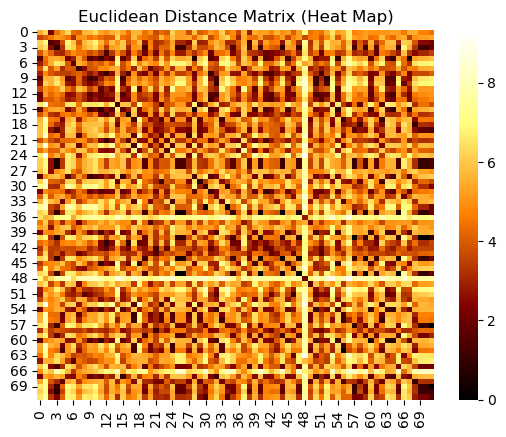

In [55]:
sns.heatmap(distance_euc, annot=False, cmap='afmhot')
plt.title('Euclidean Distance Matrix (Heat Map)')
plt.savefig('Euclidean Distance Matrix (Heat Map) completed.png', format='png', dpi=500)
plt.show()

In [56]:
autoidentity_euc = np.diag(distance_euc)

autoidentity_euc = pd.DataFrame(autoidentity_euc)
autoidentity_euc.to_csv('/Users/soniasimon/Documents/thesis/auto_euc.csv', index=False)

In [57]:
np.std(autoidentity_euc)
#autoidentity_euc.mean()

0    1.2716
dtype: float64

In [58]:
csv_EUC_ES_72 = pd.read_csv("csv_EUC_ES_72.csv")

#### convert medians to csv

In [59]:
distance_euc = pd.DataFrame(distance_euc)
distance_euc.shape

(72, 72)

In [60]:
distance_euc_median = distance_euc.median()
distance_euc_median.to_csv('distance_euc_med.csv', index=True)

### Cosine ###
* finds the 6 dimentional point between the rows

distance_cos_74 = cdist(csv_EUC_ES_74[dimensions_med_data], csv_EUC_ENG_74[dimensions_med_data], metric='cosine')
distance_cos_74.shape

distance_cos_74= pd.DataFrame(distance_cos_74)

In [61]:
# remove missing words
# reomved index 70 - sumblimation/sublimacion
#remove index 49 - CONSIGUIENTE/CONSIGUIENTE
csv_EUC_ES_72 = pd.read_csv("csv_EUC_ES_72.csv")
csv_EUC_ENG_72 = pd.read_csv("csv_EUC_ENG_72.csv")

In [62]:
distance_cos = cdist(EUC_EScols[dimensions_med_data],EUC_ENGcols[dimensions_med_data], metric='cosine')
distance_cos

array([[0.29831141, 0.33330898, 0.02717248, ..., 0.20220936, 0.20220936,
        0.17389308],
       [0.17977121, 0.14741181, 0.25735657, ..., 0.42885916, 0.42885916,
        0.42856759],
       [0.52801719, 0.49537944, 0.02322742, ..., 0.0782134 , 0.0782134 ,
        0.06630044],
       ...,
       [0.62448756, 0.54962265, 0.11078817, ..., 0.01275888, 0.01275888,
        0.        ],
       [0.56994542, 0.53756453, 0.07355422, ..., 0.01902623, 0.01902623,
        0.01852545],
       [0.6427052 , 0.62860932, 0.13733781, ..., 0.08085497, 0.08085497,
        0.0298575 ]])

In [63]:
distance_cos = pd.DataFrame(distance_cos)
distance_cos.shape

(72, 72)

In [64]:
autoidentity_cos = np.diag(distance_cos)
autoidentity_cos = pd.DataFrame(autoidentity_cos)
autoidentity_cos.to_csv('/Users/soniasimon/Documents/thesis/auto_cos.csv', index=False)
autoidentity_cos

,0
0,0.298311
1,0.147412
2,0.023227
3,0.012904
4,0.376390
...,...
67,0.048512
68,0.051317
69,0.012759
70,0.019026


In [65]:
#distance_cos_median = distance_cos.median()
distance_cos.to_csv('distance_cos_med.csv', index=True)

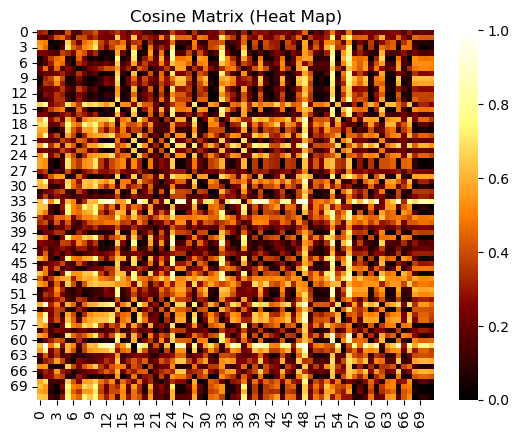

In [66]:
sns.heatmap(distance_cos, annot=False, cmap='afmhot')
plt.title('Cosine Matrix (Heat Map)')

plt.savefig('Cosine Matrix (Heat Map) completed.png', format='png', dpi=500)
plt.show()

In [67]:
# makes the indexed subsets into numpy arrays so they are easier to manilupate
EUC_SentirES_np = csv_EUC_ES_72[dimensions_med_data].to_numpy()
EUC_SentirENG_np = csv_EUC_ENG_72[dimensions_med_data].to_numpy()

In [68]:
cos_sim = distance_cos.to_numpy()

In [69]:
# acessing specific values 
similarity_value = cos_sim[0, 0]
similarity_value

0.29831141450202336

## Kruskal Wallis test

In [70]:
autoidentity_euc.columns = ['Euclidean']
autoidentity_cos.columns = ['Cosine']
autoidentity_euc

,Euclidean
0,5.500000
1,4.031129
2,1.414214
3,0.866025
4,3.000000
...,...
67,2.061553
68,1.118034
69,1.000000
70,1.118034


In [71]:
kruskal_euc = pd.concat([autoidentity_euc, EUC_ENGcols['Category']],axis=1)
kruskal_euc

,Euclidean,Category
0,5.500000,highly haptic
1,4.031129,balanced
2,1.414214,highly visual
3,0.866025,highly visual
4,3.000000,none
...,...,...
67,2.061553,highly haptic
68,1.118034,none
69,1.000000,highly visual
70,1.118034,highly visual


In [72]:
Kruskal_euc = pd.read_csv("kruskal_test_euc.csv")
Kruskal_euc

,balanced,highly haptic,highly visual,none
0,1.118034,0.500000,0.000000,0.866025
1,1.224745,1.118034,0.000000,1.000000
2,1.732051,1.414214,0.000000,1.118034
3,1.732051,1.500000,0.500000,1.224745
4,2.061553,1.581139,0.866025,1.224745
5,2.061553,1.732051,1.000000,1.414214
6,2.121320,1.802776,1.000000,1.802776
7,2.291288,2.061553,1.000000,2.000000
8,2.291288,2.121320,1.000000,2.061553
9,2.449490,2.236068,1.118034,2.061553


In [73]:
stats.kruskal(Kruskal_euc['balanced'],Kruskal_euc['highly haptic'], Kruskal_euc['highly visual'], Kruskal_euc['none'], nan_policy='omit')

KruskalResult(statistic=21.263244560452407, pvalue=9.282113102894835e-05)

In [74]:
Kruskal_euc = pd.read_csv("kruskal_test_euc.csv")
median_krus_euc= Kruskal_euc.median()
Kruskal_euc

,balanced,highly haptic,highly visual,none
0,1.118034,0.500000,0.000000,0.866025
1,1.224745,1.118034,0.000000,1.000000
2,1.732051,1.414214,0.000000,1.118034
3,1.732051,1.500000,0.500000,1.224745
4,2.061553,1.581139,0.866025,1.224745
5,2.061553,1.732051,1.000000,1.414214
6,2.121320,1.802776,1.000000,1.802776
7,2.291288,2.061553,1.000000,2.000000
8,2.291288,2.121320,1.000000,2.061553
9,2.449490,2.236068,1.118034,2.061553


In [75]:
Kruskal_euc['balanced'][18]=median_krus_euc[0]

Kruskal_euc['highly visual'][18]=median_krus_euc[2]
Kruskal_euc['none'][17]=median_krus_euc[3]
Kruskal_euc['none'][18]=median_krus_euc[3]
Kruskal_euc

,balanced,highly haptic,highly visual,none
0,1.118034,0.500000,0.000000,0.866025
1,1.224745,1.118034,0.000000,1.000000
2,1.732051,1.414214,0.000000,1.118034
3,1.732051,1.500000,0.500000,1.224745
4,2.061553,1.581139,0.866025,1.224745
5,2.061553,1.732051,1.000000,1.414214
6,2.121320,1.802776,1.000000,1.802776
7,2.291288,2.061553,1.000000,2.000000
8,2.291288,2.121320,1.000000,2.061553
9,2.449490,2.236068,1.118034,2.061553


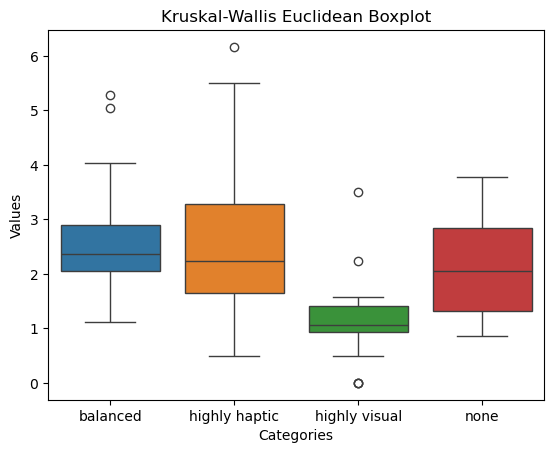

In [76]:
# Create a list of columns to be plotted
krusk_euc_cols = ['balanced', 'highly haptic', 'highly visual', 'none']

# Create a boxplot using Seaborn
sns.boxplot(data=Kruskal_euc[krusk_euc_cols])

# Set the title and labels
plt.title('Kruskal-Wallis Euclidean Boxplot')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show the plot
plt.savefig('Kruskal-Wallis Euclidean Boxplot.png', format='png', dpi=600)
plt.show()


In [77]:
Kruskal_cos = pd.read_csv("kruskal_test_cos.csv")
Kruskal_euc

,balanced,highly haptic,highly visual,none
0,1.118034,0.500000,0.000000,0.866025
1,1.224745,1.118034,0.000000,1.000000
2,1.732051,1.414214,0.000000,1.118034
3,1.732051,1.500000,0.500000,1.224745
4,2.061553,1.581139,0.866025,1.224745
5,2.061553,1.732051,1.000000,1.414214
6,2.121320,1.802776,1.000000,1.802776
7,2.291288,2.061553,1.000000,2.000000
8,2.291288,2.121320,1.000000,2.061553
9,2.449490,2.236068,1.118034,2.061553


In [78]:
kruskal_cos = pd.concat([autoidentity_cos, EUC_ENGcols['Category']],axis=1)
kruskal_cos

,Cosine,Category
0,0.298311,highly haptic
1,0.147412,balanced
2,0.023227,highly visual
3,0.012904,highly visual
4,0.376390,none
...,...,...
67,0.048512,highly haptic
68,0.051317,none
69,0.012759,highly visual
70,0.019026,highly visual


In [79]:
#test_cos=pd.pivot(kruskal_cos, columns="Category",values="Cosine")

In [80]:
Kruskal_cos = pd.read_csv("kruskal_test_cos.csv")
median_krus_cos= Kruskal_cos.median()
Kruskal_cos

,balanced,highly haptic,highly visual,none
0,0.012065,0.001931,0.000000e+00,0.003976
1,0.012065,0.013333,0.000000e+00,0.014207
2,0.021768,0.018687,1.110000e-16,0.016718
3,0.028203,0.022493,3.267830e-03,0.033245
4,0.039890,0.027655,9.852457e-03,0.038880
5,0.041006,0.028000,1.275888e-02,0.049618
6,0.053306,0.028670,1.275888e-02,0.051317
7,0.073821,0.046641,1.290377e-02,0.054389
8,0.077158,0.048512,1.671800e-02,0.070836
9,0.078894,0.048725,1.902623e-02,0.071984


In [81]:
Kruskal_cos['balanced'][18]=median_krus_cos[0]

Kruskal_cos['highly visual'][18]=median_krus_cos[2]
Kruskal_cos['none'][17]=median_krus_cos[3]
Kruskal_cos['none'][18]=median_krus_cos[3]
Kruskal_cos


,balanced,highly haptic,highly visual,none
0,0.012065,0.001931,0.000000e+00,0.003976
1,0.012065,0.013333,0.000000e+00,0.014207
2,0.021768,0.018687,1.110000e-16,0.016718
3,0.028203,0.022493,3.267830e-03,0.033245
4,0.039890,0.027655,9.852457e-03,0.038880
5,0.041006,0.028000,1.275888e-02,0.049618
6,0.053306,0.028670,1.275888e-02,0.051317
7,0.073821,0.046641,1.290377e-02,0.054389
8,0.077158,0.048512,1.671800e-02,0.070836
9,0.078894,0.048725,1.902623e-02,0.071984


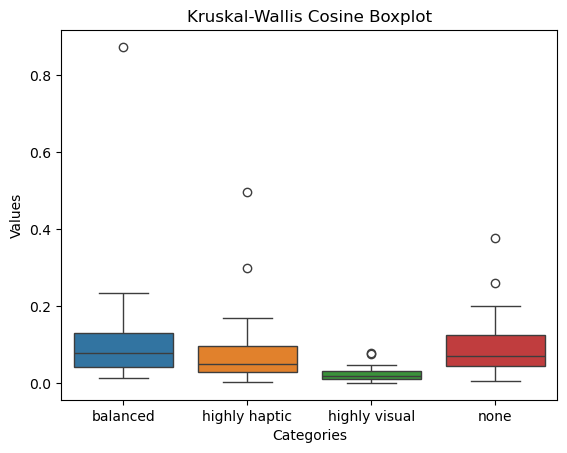

In [82]:
# Create a list of columns to be plotted
krusk_cos_cols = ['balanced', 'highly haptic', 'highly visual', 'none']

# Create a boxplot using Seaborn
sns.boxplot(data=Kruskal_cos[krusk_cos_cols])

# Set the title and labels
plt.title('Kruskal-Wallis Cosine Boxplot')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show the plot
plt.savefig('Kruskal-Wallis Cosine Boxplot.png', format='png', dpi=600)
plt.show()


In [83]:
stats.kruskal(Kruskal_cos['balanced'],Kruskal_cos['highly haptic'], Kruskal_cos['highly visual'], Kruskal_cos['none'], nan_policy='omit')

KruskalResult(statistic=19.287373501501477, pvalue=0.00023842818864989502)

## Wilcoxson comparisons

- comparing euclidean sensory modalities against each other 

In [84]:
wilcox_euc_b2h = wilcoxon(Kruskal_euc['balanced'],Kruskal_euc['highly haptic'], nan_policy='omit')
wilcox_euc_b2h.statistic, wilcox_euc_b2h.pvalue

wilcox_euc_b2h_p = wilcox_euc_b2h.pvalue
wilcox_euc_b2h_p  

0.007144927978515625

In [85]:
wilcox_euc_b2v = wilcoxon(Kruskal_euc['balanced'],Kruskal_euc['highly visual'], nan_policy='omit')
wilcox_euc_b2v.statistic, wilcox_euc_b2v.pvalue

wilcox_euc_b2v_p = wilcox_euc_b2v.pvalue
wilcox_euc_b2v_p 

3.814697265625e-06

In [86]:
wilcox_euc_b2n = wilcoxon(Kruskal_euc['balanced'],Kruskal_euc['none'], nan_policy='omit')
wilcox_euc_b2n.statistic, wilcox_euc_b2n.pvalue

wilcox_euc_b2n_p = wilcox_euc_b2n.pvalue
wilcox_euc_b2n_p 

0.00141143798828125

In [87]:
wilcox_euc_h2v = wilcoxon(Kruskal_euc['highly haptic'],Kruskal_euc['highly visual'], nan_policy='omit')
wilcox_euc_h2v.statistic, wilcox_euc_h2v.pvalue

wilcox_euc_h2v_p = wilcox_euc_h2v.pvalue
wilcox_euc_h2v_p 

3.814697265625e-06

In [88]:
wilcox_euc_h2n = wilcoxon(Kruskal_euc['highly haptic'],Kruskal_euc['none'], nan_policy='omit')
wilcox_euc_h2n.statistic, wilcox_euc_h2n.pvalue

wilcox_euc_h2n_p = wilcox_euc_b2n.pvalue
wilcox_euc_h2n_p

/Users/soniasimon/miniconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


0.00141143798828125

In [89]:
wilcox_euc_v2n = wilcoxon(Kruskal_euc['highly visual'],Kruskal_euc['none'], nan_policy='omit')
wilcox_euc_v2n.statistic, wilcox_euc_v2n.pvalue

wilcox_euc_v2n_p = wilcox_euc_v2n.pvalue
wilcox_euc_v2n_p 

0.000335693359375

- comparing cosine sensory modalities against each other 

In [90]:
wilcox_cos_b2h = wilcoxon(Kruskal_cos['balanced'],Kruskal_cos['highly haptic'], nan_policy='omit')
wilcox_cos_b2h.statistic, wilcox_cos_b2h.pvalue

(19.0, 0.001171112060546875)

In [91]:
wilcox_cos_b2v = wilcoxon(Kruskal_cos['balanced'],Kruskal_cos['highly visual'], nan_policy='omit')
wilcox_cos_b2v.statistic, wilcox_cos_b2v.pvalue

(0.0, 3.814697265625e-06)

In [92]:
wilcox_cos_b2n = wilcoxon(Kruskal_cos['balanced'],Kruskal_cos['none'], nan_policy='omit')
wilcox_cos_b2n.statistic, wilcox_cos_b2n.pvalue

(78.0, 0.5152778625488281)

In [93]:
wilcox_cos_h2v = wilcoxon(Kruskal_cos['highly haptic'],Kruskal_cos['highly visual'], nan_policy='omit')
wilcox_cos_h2v.statistic, wilcox_cos_h2v.pvalue

(0.0, 3.814697265625e-06)

In [94]:
wilcox_cos_v2n = wilcoxon(Kruskal_cos['highly visual'],Kruskal_cos['none'], nan_policy='omit')
wilcox_cos_v2n.statistic, wilcox_cos_v2n.pvalue

(2.0, 1.1444091796875e-05)

In [95]:
wilcox_cos_h2n = wilcoxon(Kruskal_cos['highly haptic'],Kruskal_cos['none'], nan_policy='omit')
wilcox_cos_h2n.statistic, wilcox_cos_h2n.pvalue

(39.0, 0.02298736572265625)

#### Euclidean distance into csv

### Chi squared ###

- load medians
- load data
- convert from wide to long format
- wilcox-

In [96]:
category_df = pd.DataFrame(EUC_EScols['Category'])
category_df.to_csv('/Users/soniasimon/Documents/thesis/category.csv', index=False)
category_df

,Category
0,highly haptic
1,balanced
2,highly visual
3,highly visual
4,none
...,...
67,highly haptic
68,none
69,highly visual
70,highly visual


In [97]:
index_df = pd.DataFrame(EUC_EScols['Index'])
index_df.to_csv('/Users/soniasimon/Documents/thesis/category.csv', index=False)
index_df

,Index
0,0
1,1
2,2
3,3
4,4
...,...
67,67
68,68
69,69
70,70


## wilcoxson

In [98]:
wilcox_wide = pd.concat([autoidentity_euc['Euclidean'], autoidentity_cos['Cosine']], axis=1, keys=['Euclidean', 'Cosine'])
wilcox_wide 

,Euclidean,Cosine
0,5.500000,0.298311
1,4.031129,0.147412
2,1.414214,0.023227
3,0.866025,0.012904
4,3.000000,0.376390
...,...,...
67,2.061553,0.048512
68,1.118034,0.051317
69,1.000000,0.012759
70,1.118034,0.019026


In [99]:
wilcox_wide= pd.DataFrame(wilcox_wide)
wilcox_wide

,Euclidean,Cosine
0,5.500000,0.298311
1,4.031129,0.147412
2,1.414214,0.023227
3,0.866025,0.012904
4,3.000000,0.376390
...,...,...
67,2.061553,0.048512
68,1.118034,0.051317
69,1.000000,0.012759
70,1.118034,0.019026


In [100]:
wilcox_test = wilcoxon(wilcox_wide)

wilcox_test.statistic, wilcox_test.pvalue

(array([0., 0.]), array([5.14179913e-13, 3.55700910e-13]))

In [101]:
Xi_wide_Span = pd.DataFrame(EUC_EScols)
Xi_wide_Span['Language'] = 'Spanish'

Xi_wide_Eng = pd.DataFrame(EUC_ENGcols)
Xi_wide_Eng['Language'] = 'English'


# use the .concat function to combine the visual and haptic dataframes together to make 1 single new column
Xi_wide_lang = pd.concat([Xi_wide_Span, Xi_wide_Eng], ignore_index=True)
Xi_wide_lang

,Index,Word,Category,auditionslider.response,tasteslider.response,hapticslider.response,olfactionslider.response,visionslider.response,interoceptionsslider.response,Language
0,0,EMOCIONANTE,highly haptic,4.0,1.0,2.0,2.0,5.0,3.0,Spanish
1,1,CUAJAR,balanced,1.5,3.0,3.0,2.0,3.0,1.0,Spanish
2,2,DÍA,highly visual,3.0,0.0,0.0,1.0,5.0,2.0,Spanish
3,3,A LA VISTA,highly visual,1.5,0.0,0.0,0.5,5.0,1.0,Spanish
4,4,SOBRESCRIBIR,none,1.0,0.0,2.0,0.0,3.0,0.0,Spanish
...,...,...,...,...,...,...,...,...,...,...
139,67,HARD,highly haptic,1.0,1.0,5.0,0.0,3.0,1.0,English
140,68,HYPERKINETIC,none,2.0,0.0,0.0,0.0,2.0,0.0,English
141,69,INTERNET SITE,highly visual,2.0,0.0,0.0,0.0,5.0,0.0,English
142,70,PICTURES,highly visual,2.0,0.0,0.0,0.0,5.0,0.0,English


In [102]:
#chi dataframe [index, WordENG, WordSPAN]  EUC, COS, Category 

Xi_wide_Span.columns = ['Index',
 'Word_Span',
 'Category_Span',
 'audition_Span',
 'taste_Span',
 'haptic_Span',
 'olfaction_Span',
 'vision_Span',
 'interoception_Span',
 'Language_Span']
Xi_wide_Span

,Index,Word_Span,Category_Span,audition_Span,taste_Span,haptic_Span,olfaction_Span,vision_Span,interoception_Span,Language_Span
0,0,EMOCIONANTE,highly haptic,4.0,1.0,2.0,2.0,5.0,3.0,Spanish
1,1,CUAJAR,balanced,1.5,3.0,3.0,2.0,3.0,1.0,Spanish
2,2,DÍA,highly visual,3.0,0.0,0.0,1.0,5.0,2.0,Spanish
3,3,A LA VISTA,highly visual,1.5,0.0,0.0,0.5,5.0,1.0,Spanish
4,4,SOBRESCRIBIR,none,1.0,0.0,2.0,0.0,3.0,0.0,Spanish
...,...,...,...,...,...,...,...,...,...,...
67,67,DURA,highly haptic,2.5,0.0,5.0,0.0,3.0,2.0,Spanish
68,68,HIPERCINÉTICO,none,2.5,0.0,0.0,0.0,2.0,1.0,Spanish
69,69,SITIO WEB,highly visual,3.0,0.0,0.0,0.0,5.0,0.0,Spanish
70,70,IMÁGENES,highly visual,2.5,0.0,0.0,0.0,5.0,1.0,Spanish


In [103]:
dimensions = list(Xi_wide_Span.columns.values)
dimensions_Span = dimensions[3:9]
dimensions_Span # 'Word' - 'Visual.mean'

['audition_Span',
 'taste_Span',
 'haptic_Span',
 'olfaction_Span',
 'vision_Span',
 'interoception_Span']

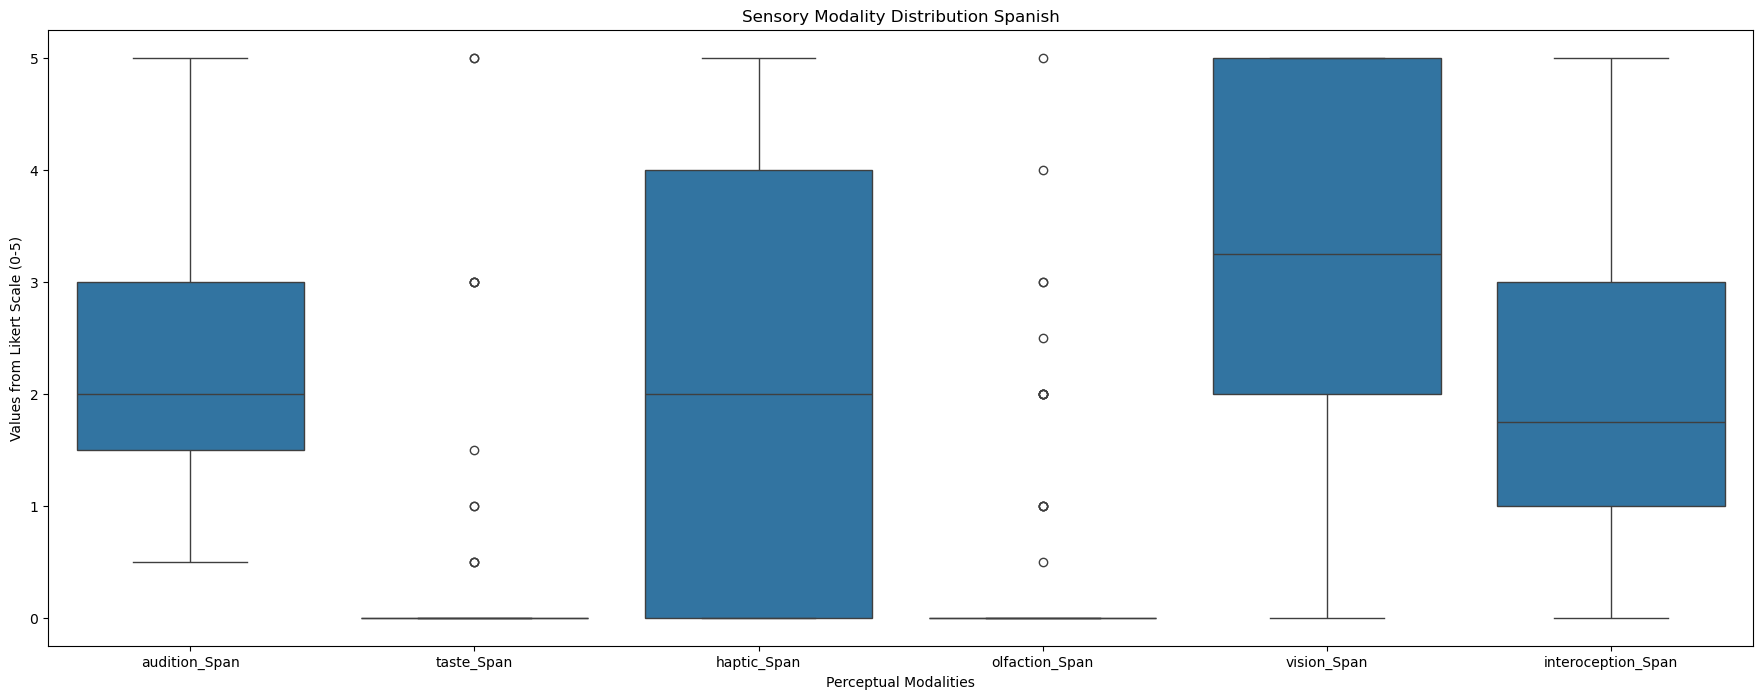

In [104]:
# set plot = the unique haptic dataframe
Xi_wide_Span_plot = Xi_wide_Span[dimensions_Span]

plt.figure(figsize=(22, 8))
# label the plot
sns.boxplot(x ='variable', y = 'value', data = pd.melt(Xi_wide_Span_plot))
plt.ylabel('Values from Likert Scale (0-5)')
plt.xlabel('Perceptual Modalities')
plt.title('Sensory Modality Distribution Spanish')
plt.savefig('Sensory Modality Distribution Spanish.png', format='png', dpi=600)
plt.show()

In [105]:
#chi dataframe [index, WordENG, WordSPAN]  EUC, COS, Category 

Xi_wide_Eng.columns = ['Index',
 'Word_ENG',
 'Category_ENG',
 'auditions_ENG',
 'taste_ENG',
 'haptic_ENG',
 'olfaction_ENG',
 'vision_ENG',
 'interoception_ENG',
 'Language_ENG']
Xi_wide_Eng

,Index,Word_ENG,Category_ENG,auditions_ENG,taste_ENG,haptic_ENG,olfaction_ENG,vision_ENG,interoception_ENG,Language_ENG
0,0,TOUCHING,highly haptic,1.0,1.0,5.0,0.5,2.0,2.0,English
1,1,JELL,balanced,0.0,1.0,5.0,4.0,4.0,0.0,English
2,2,DAYTIME,highly visual,3.0,0.0,1.0,2.0,5.0,2.0,English
3,3,IN SIGHT,highly visual,2.0,0.0,0.0,0.0,5.0,0.5,English
4,4,OVERRIDE,none,1.0,0.0,0.0,0.0,2.0,2.0,English
...,...,...,...,...,...,...,...,...,...,...
67,67,HARD,highly haptic,1.0,1.0,5.0,0.0,3.0,1.0,English
68,68,HYPERKINETIC,none,2.0,0.0,0.0,0.0,2.0,0.0,English
69,69,INTERNET SITE,highly visual,2.0,0.0,0.0,0.0,5.0,0.0,English
70,70,PICTURES,highly visual,2.0,0.0,0.0,0.0,5.0,0.0,English


In [106]:
dimensions = list(Xi_wide_Eng.columns.values)
dimensions_Eng = dimensions[3:9]
dimensions_Eng # 'Word' - 'Visual.mean'

['auditions_ENG',
 'taste_ENG',
 'haptic_ENG',
 'olfaction_ENG',
 'vision_ENG',
 'interoception_ENG']

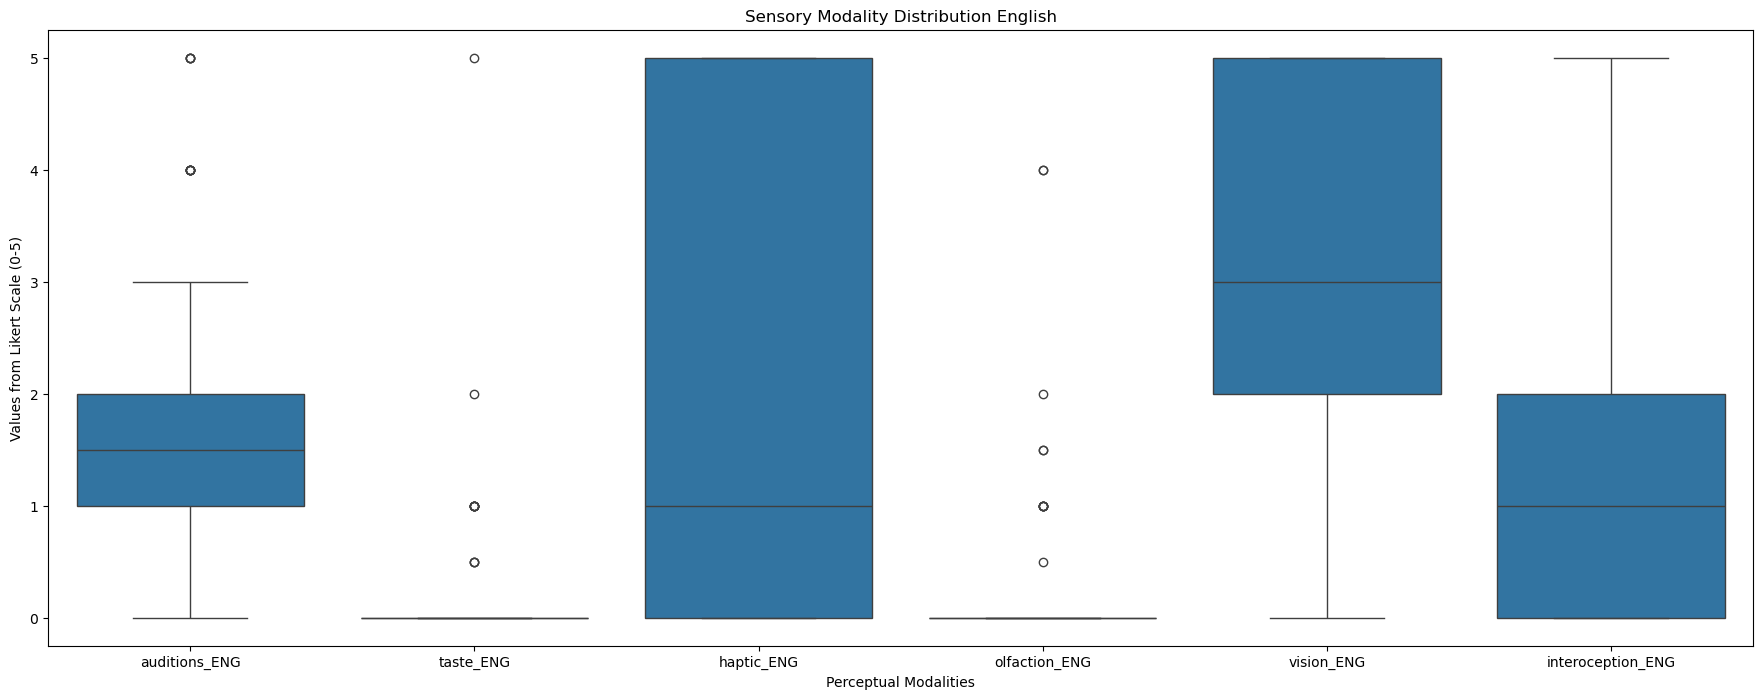

In [107]:
# set plot = the unique haptic dataframe
Xi_wide_Eng_plot = Xi_wide_Eng[dimensions_Eng]

plt.figure(figsize=(22, 8))
# label the plot
sns.boxplot(x ='variable', y = 'value', data = pd.melt(Xi_wide_Eng_plot))

plt.ylabel('Values from Likert Scale (0-5)')
plt.xlabel('Perceptual Modalities')
plt.title('Sensory Modality Distribution English')
plt.savefig('Sensory Modality Distribution English.png', format='png', dpi=600)
plt.show()

In [108]:
Xi_wide_Span.columns

Index(['Index', 'Word_Span', 'Category_Span', 'audition_Span', 'taste_Span',
       'haptic_Span', 'olfaction_Span', 'vision_Span', 'interoception_Span',
       'Language_Span'],
      dtype='object')

In [109]:
# add keys   axis=1, keys=['Euclidean', 'Cosine']

In [110]:
#chi dataframe [index, WordENG, WordSPAN]  EUC, COS, Category 
Xi_mixed2plot = pd.concat([Xi_wide_Span['audition_Span'],Xi_wide_Eng['auditions_ENG'],
                           Xi_wide_Span['taste_Span'],Xi_wide_Eng['taste_ENG'],
                           Xi_wide_Span['haptic_Span'],Xi_wide_Eng['haptic_ENG'],
                           Xi_wide_Span['olfaction_Span'],Xi_wide_Eng['olfaction_ENG'],
                           Xi_wide_Span['vision_Span'],Xi_wide_Eng['vision_ENG'],
                           Xi_wide_Span['interoception_Span'],Xi_wide_Eng['interoception_ENG']],
                          axis=1)
Xi_mixed2plot

,audition_Span,auditions_ENG,taste_Span,taste_ENG,haptic_Span,haptic_ENG,olfaction_Span,olfaction_ENG,vision_Span,vision_ENG,interoception_Span,interoception_ENG
0,4.0,1.0,1.0,1.0,2.0,5.0,2.0,0.5,5.0,2.0,3.0,2.0
1,1.5,0.0,3.0,1.0,3.0,5.0,2.0,4.0,3.0,4.0,1.0,0.0
2,3.0,3.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,5.0,2.0,2.0
3,1.5,2.0,0.0,0.0,0.0,0.0,0.5,0.0,5.0,5.0,1.0,0.5
4,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2.5,1.0,0.0,1.0,5.0,5.0,0.0,0.0,3.0,3.0,2.0,1.0
68,2.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0
69,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0
70,2.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,0.0


In [146]:
mix_dataframe = pd.concat([Xi_wide_Span['Category_Span'],Xi_wide_Span['Word_Span'],Xi_wide_Eng['Word_ENG'],
                 Xi_wide_Span['audition_Span'],Xi_wide_Eng['auditions_ENG'],
                           Xi_wide_Span['taste_Span'],Xi_wide_Eng['taste_ENG'],
                           Xi_wide_Span['haptic_Span'],Xi_wide_Eng['haptic_ENG'],
                           Xi_wide_Span['olfaction_Span'],Xi_wide_Eng['olfaction_ENG'],
                           Xi_wide_Span['vision_Span'],Xi_wide_Eng['vision_ENG'],
                           Xi_wide_Span['interoception_Span'],Xi_wide_Eng['interoception_ENG'],
                           Xi_wide_Span['Language_Span'],Xi_wide_Eng['Language_ENG'] ],
                          axis=1)
mix_dataframe.to_csv('mix_dataframe.csv')

In [114]:
dimensions = list(Xi_mixed2plot.columns.values)
dimensions_mix2plot = dimensions[:12]
dimensions_mix2plot # 'Word' - 'Visual.mean'

['audition_Span',
 'auditions_ENG',
 'taste_Span',
 'taste_ENG',
 'haptic_Span',
 'haptic_ENG',
 'olfaction_Span',
 'olfaction_ENG',
 'vision_Span',
 'vision_ENG',
 'interoception_Span',
 'interoception_ENG']

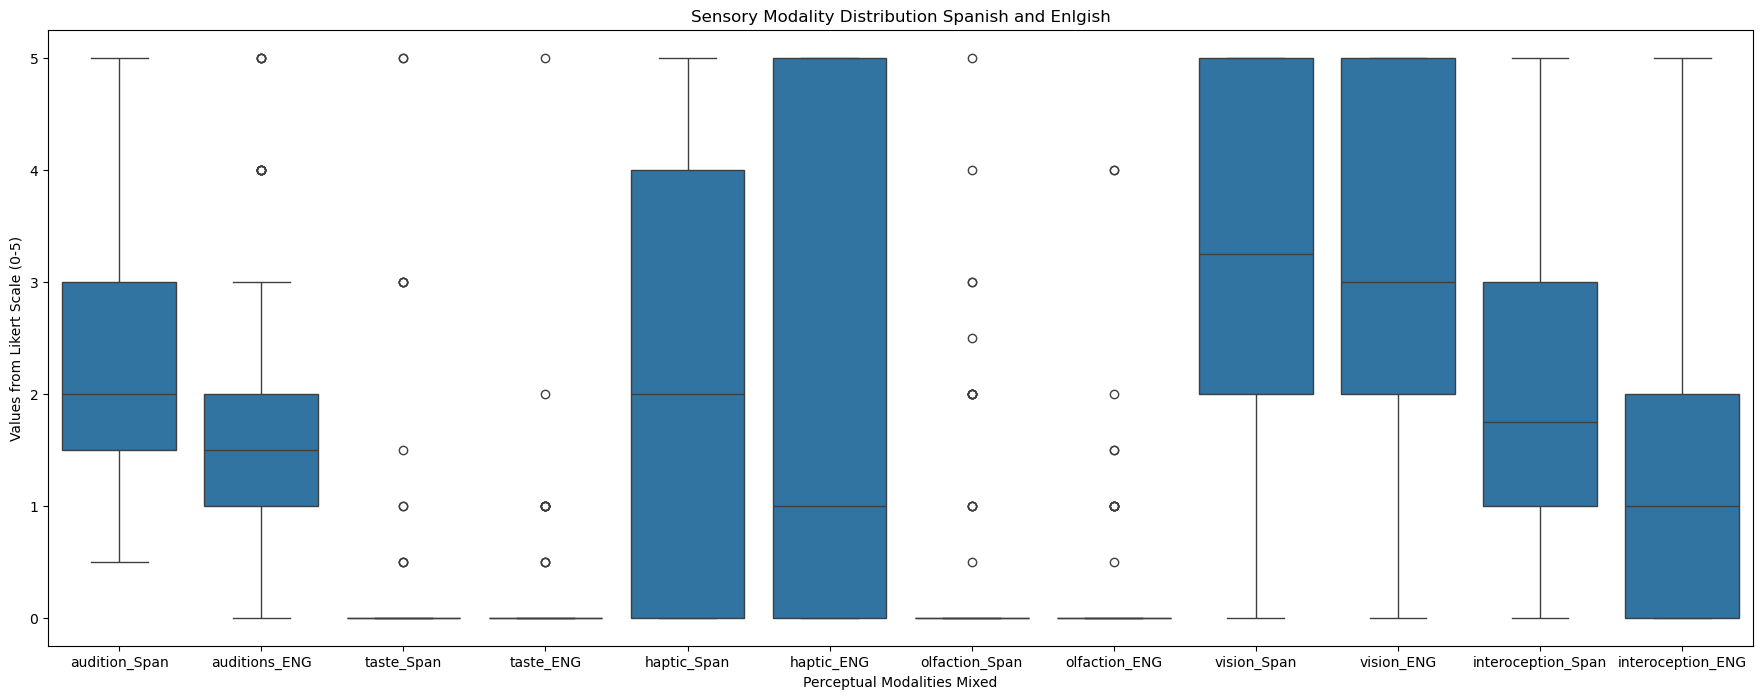

In [115]:
# set plot = the unique haptic dataframe
Xi_mixed_box = Xi_mixed2plot[dimensions_mix2plot]

plt.figure(figsize=(22, 8))
# label the plot
sns.boxplot(x ='variable', y = 'value', data = pd.melt(Xi_mixed_box))

plt.ylabel('Values from Likert Scale (0-5)')
plt.xlabel('Perceptual Modalities Mixed')
plt.title('Sensory Modality Distribution Spanish and Enlgish')
plt.savefig('Sensory Modality Distribution Spanish and Enlgish.png', format='png', dpi=1200)
plt.show()

In [116]:
Xi_mean = Xi_mixed2plot[dimensions_mix2plot].mean()
Xi_mean = pd.DataFrame(Xi_mean)
Xi_mean.to_csv('/Users/soniasimon/Documents/thesis/Chi-sqaured-mean.csv', index=False)

- comparing each Spanish and 

In [117]:
Xi_mixed2plot.columns

Index(['audition_Span', 'auditions_ENG', 'taste_Span', 'taste_ENG',
       'haptic_Span', 'haptic_ENG', 'olfaction_Span', 'olfaction_ENG',
       'vision_Span', 'vision_ENG', 'interoception_Span', 'interoception_ENG'],
      dtype='object')

In [118]:
wilcox_audition = wilcoxon(Xi_mixed2plot['audition_Span'],Xi_mixed2plot['auditions_ENG'], nan_policy='omit')
wilcox_audition.statistic, wilcox_audition.pvalue

wilcox_audition_p = wilcox_audition.pvalue
wilcox_audition_p

0.0003729268370188488

In [119]:
wilcox_taste = wilcoxon(Xi_mixed2plot['taste_Span'],Xi_mixed2plot['taste_ENG'], nan_policy='omit')
wilcox_taste.statistic, wilcox_taste.pvalue

wilcox_taste_p = wilcox_taste.pvalue
wilcox_taste_p

0.12071957526500347

In [120]:
wilcox_haptic = wilcoxon(Xi_mixed2plot['haptic_Span'],Xi_mixed2plot['haptic_ENG'], nan_policy='omit')
wilcox_haptic.statistic, wilcox_haptic.pvalue

wilcox_haptic_p = wilcox_haptic.pvalue
wilcox_haptic_p

0.43820538168743906

In [121]:
wilcox_olfaction = wilcoxon(Xi_mixed2plot['olfaction_Span'],Xi_mixed2plot['olfaction_ENG'], nan_policy='omit')
wilcox_olfaction.statistic, wilcox_olfaction.pvalue

wilcox_olfaction_p = wilcox_olfaction.pvalue
wilcox_olfaction_p

0.025449693108898032

In [122]:
wilcox_vision = wilcoxon(Xi_mixed2plot['vision_Span'],Xi_mixed2plot['vision_ENG'], nan_policy='omit')
wilcox_vision.statistic, wilcox_vision.pvalue

wilcox_vision_p = wilcox_vision.pvalue
wilcox_vision_p

0.016629207173191815

In [123]:
wilcox_interoception = wilcoxon(Xi_mixed2plot['interoception_Span'],Xi_mixed2plot['interoception_ENG'], nan_policy='omit')
wilcox_interoception.statistic, wilcox_interoception.pvalue

wilcox_interoception_p = wilcox_interoception.pvalue
wilcox_interoception_p

0.0006246912374367603

In [124]:
Xi_wide_lang.columns

Index(['Index', 'Word', 'Category', 'auditionslider.response',
       'tasteslider.response', 'hapticslider.response',
       'olfactionslider.response', 'visionslider.response',
       'interoceptionsslider.response', 'Language'],
      dtype='object')

In [125]:
#melt into long
Xi_lang_melted = pd.melt(Xi_wide_lang, id_vars=['Index','Word','Category','Language'])
Xi_lang_melted

,Index,Word,Category,Language,variable,value
0,0,EMOCIONANTE,highly haptic,Spanish,auditionslider.response,4.0
1,1,CUAJAR,balanced,Spanish,auditionslider.response,1.5
2,2,DÍA,highly visual,Spanish,auditionslider.response,3.0
3,3,A LA VISTA,highly visual,Spanish,auditionslider.response,1.5
4,4,SOBRESCRIBIR,none,Spanish,auditionslider.response,1.0
...,...,...,...,...,...,...
859,67,HARD,highly haptic,English,interoceptionsslider.response,1.0
860,68,HYPERKINETIC,none,English,interoceptionsslider.response,0.0
861,69,INTERNET SITE,highly visual,English,interoceptionsslider.response,0.0
862,70,PICTURES,highly visual,English,interoceptionsslider.response,0.0


In [126]:
# Create a contingency table

contingency_table = pd.crosstab(Xi_lang_melted['value'], Xi_lang_melted['Language'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Print the results
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-squared statistic: 15.023799937395907
p-value: 0.13119655976291672
Degrees of freedom: 10
Expected frequencies: [[172.  172. ]
 [  8.    8. ]
 [ 56.5  56.5]
 [ 11.5  11.5]
 [ 52.5  52.5]
 [  9.    9. ]
 [ 40.5  40.5]
 [  5.5   5.5]
 [ 27.5  27.5]
 [  1.5   1.5]
 [ 47.5  47.5]]


<Axes: ylabel='Count'>

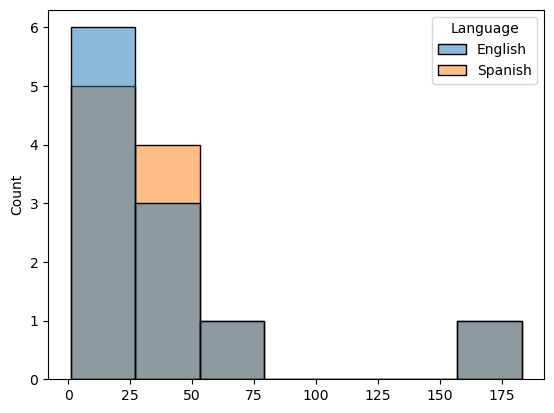

In [127]:
sns.histplot(data=contingency_table)

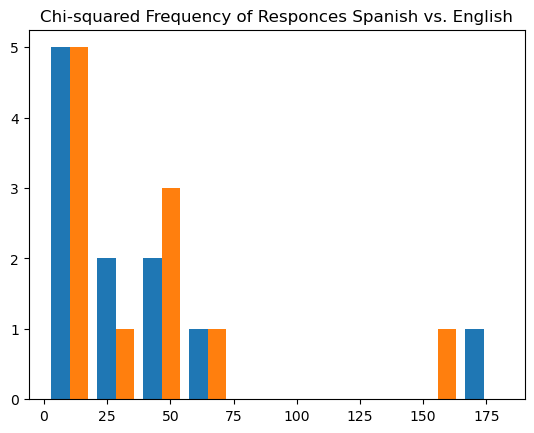

In [128]:
plt.hist(contingency_table)
#plt.ylabel('Likert Scale Ratings')
#plt.xlabel('Frequency of Responces')
plt.title('Chi-squared Frequency of Responces Spanish vs. English')
plt.savefig('Chi-Squared Frequency Table Spanish vs English.png', format='png', dpi=1000)

<Axes: title={'center': 'Chi-squared Frequency of Responces'}, xlabel='Likert Scale Ratings', ylabel='Frequency of Responces'>

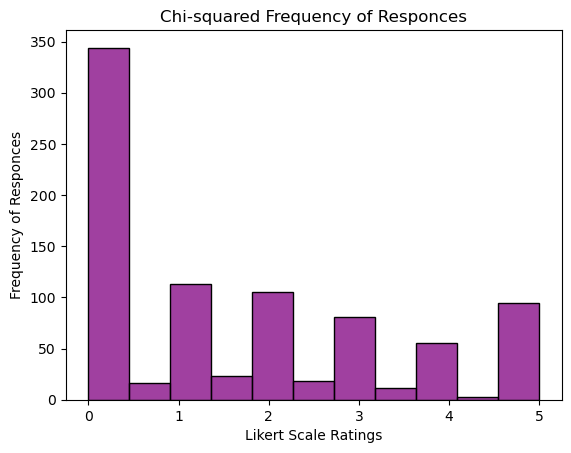

In [129]:
plt.xlabel('Likert Scale Ratings')
plt.ylabel('Frequency of Responces')
plt.title('Chi-squared Frequency of Responces')
sns.histplot(data=contingency_table, x=Xi_lang_melted['value'], color='Purple')

In [130]:
contingency_table

Language,English,Spanish
value,,
0.0,183,161
0.5,9,7
1.0,67,46
1.5,10,13
2.0,48,57
2.5,8,10
3.0,30,51
3.5,4,7
4.0,23,32


In [131]:
contingency_table.columns

Index(['English', 'Spanish'], dtype='object', name='Language')

## Multivariate visualization

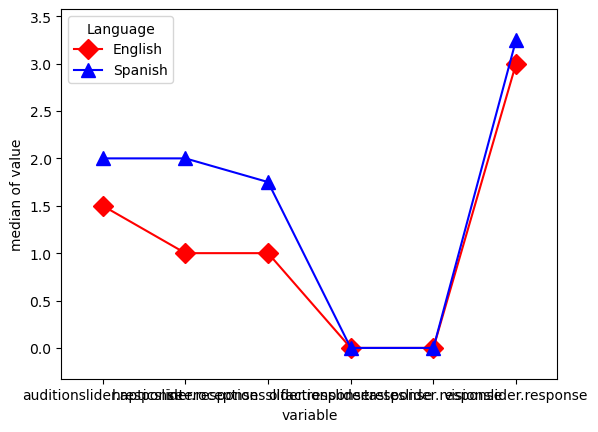

In [132]:
figure_xi = interaction_plot(Xi_lang_melted.variable, Xi_lang_melted.Language, 
                                Xi_lang_melted.value,func = np.median, plottype='b', colors =['red', 'blue'], markers=['D', '^'], ms=10)

figure_xi.savefig('interaction_plot.png', dpi=600)

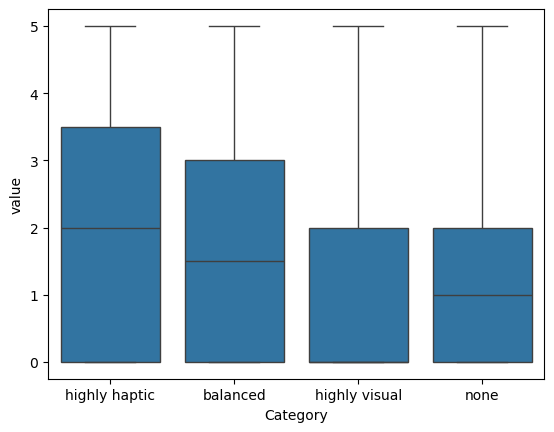

In [133]:
ax = sns.boxplot(x = 'Category', y = 'value', data = Xi_lang_melted)

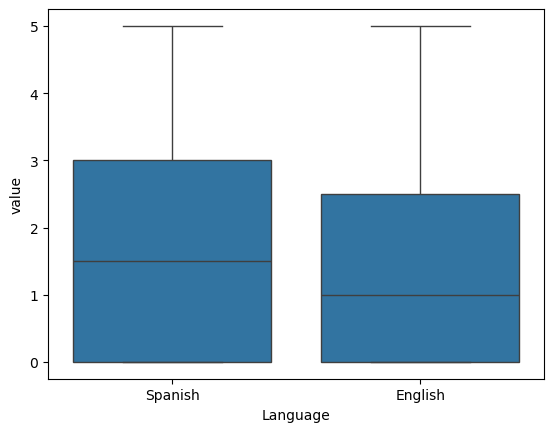

In [134]:
ax = sns.boxplot(x = 'Language', y = 'value', data = Xi_lang_melted)

In [135]:
Xi_lang_melted = pd.melt(Xi_wide_lang, id_vars=['Index','Word','Category','Language'])
Xi_lang_melted

,Index,Word,Category,Language,variable,value
0,0,EMOCIONANTE,highly haptic,Spanish,auditionslider.response,4.0
1,1,CUAJAR,balanced,Spanish,auditionslider.response,1.5
2,2,DÍA,highly visual,Spanish,auditionslider.response,3.0
3,3,A LA VISTA,highly visual,Spanish,auditionslider.response,1.5
4,4,SOBRESCRIBIR,none,Spanish,auditionslider.response,1.0
...,...,...,...,...,...,...
859,67,HARD,highly haptic,English,interoceptionsslider.response,1.0
860,68,HYPERKINETIC,none,English,interoceptionsslider.response,0.0
861,69,INTERNET SITE,highly visual,English,interoceptionsslider.response,0.0
862,70,PICTURES,highly visual,English,interoceptionsslider.response,0.0


In [136]:
combined_med_data_df = combined_med_data_df.groupby(["Index", "Word","Category"]).median()
combined_med_data_df 

auditionslider.response  \
Index Word                 Category                                 
0     EMOCIONANTE          highly haptic                      4.0   
      TOUCHING             highly haptic                      1.0   
1     CUAJAR               balanced                           1.5   
      JELL                 balanced                           0.0   
2     DAYTIME              highly visual                      3.0   
...                                                           ...   
69    SITIO WEB            highly visual                      3.0   
70    IMÁGENES             highly visual                      2.5   
      PICTURES             highly visual                      2.0   
71    BUS DRIVER           highly visual                      3.0   
      CONDUCTOR DE AUTOBÚS highly visual                      4.0   

                                          tasteslider.response  \
Index Word                 Category                              
0     EMOCIONANTE          highly haptic                   1.0   
      TOUCHING             highly haptic                   1.0   
1     CUAJAR               balanced                        3.0   
      JELL                 balanced                        1.0   
2     DAYTIME              highly visual                   0.0   
...                                                        ...   
69    SITIO WEB            highly visual                   0.0   
70    IMÁGENES             highly visual                   0.0   
      PICTURES             highly visual                   0.0   
71    BUS DRIVER           highly visual                   0.0   
      CONDUCTOR DE AUTOBÚS highly visual                   0.0   

                                          hapticslider.response  \
Index Word                 Category                               
0     EMOCIONANTE          highly haptic                    2.0   
      TOUCHING             highly haptic                    5.0   
1     CUAJAR               balanced                         3.0   
      JELL                 balanced                         5.0   
2     DAYTIME              highly visual                    1.0   
...                                                         ...   
69    SITIO WEB            highly visual                    0.0   
70    IMÁGENES             highly visual                    0.0   
      PICTURES             highly visual                    0.0   
71    BUS DRIVER           highly visual                    0.0   
      CONDUCTOR DE AUTOBÚS highly visual                    0.0   

                                          olfactionslider.response  \
Index Word                 Category                                  
0     EMOCIONANTE          highly haptic                       2.0   
      TOUCHING             highly haptic                       0.5   
1     CUAJAR               balanced                            2.0   
      JELL                 balanced                            4.0   
2     DAYTIME              highly visual                       2.0   
...                                                            ...   
69    SITIO WEB            highly visual                       0.0   
70    IMÁGENES             highly visual                       0.0   
      PICTURES             highly visual                       0.0   
71    BUS DRIVER           highly visual                       0.0   
      CONDUCTOR DE AUTOBÚS highly visual                       0.0   

                                          visionslider.response  \
Index Word                 Category                               
0     EMOCIONANTE          highly haptic                    5.0   
      TOUCHING             highly haptic                    2.0   
1     CUAJAR               balanced                         3.0   
      JELL                 balanced                         4.0   
2     DAYTIME              highly visual                    5.0   
...                              

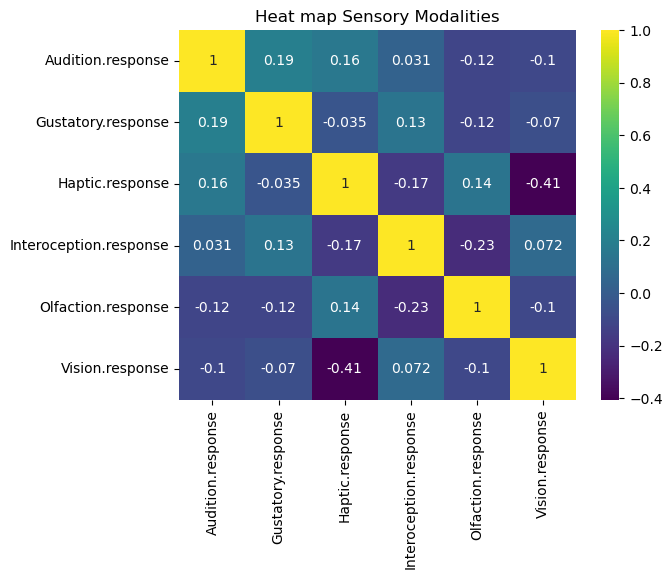

In [137]:
# Assuming 'Audition.response' and 'Gustatory.response' are your dataframes
heat_ENG = pd.read_csv('output_ENG.csv')  # Replace with your file paths
heat_SPAN = pd.read_csv('output_SPAN.csv')

# Combine the dataframes into a single DataFrame
combined_df = pd.concat([heat_ENG, heat_SPAN], ignore_index=True)

# Select the desired columns
columns_to_compare = ["Audition.response", "Gustatory.response", "Haptic.response", "Interoception.response", "Olfaction.response", "Vision.response"]
selected_df = combined_df[columns_to_compare]

# Create the heatmap
sns.heatmap(selected_df.corr(), annot=True, cmap='viridis')
plt.title('Heat map Sensory Modalities')
plt.show()

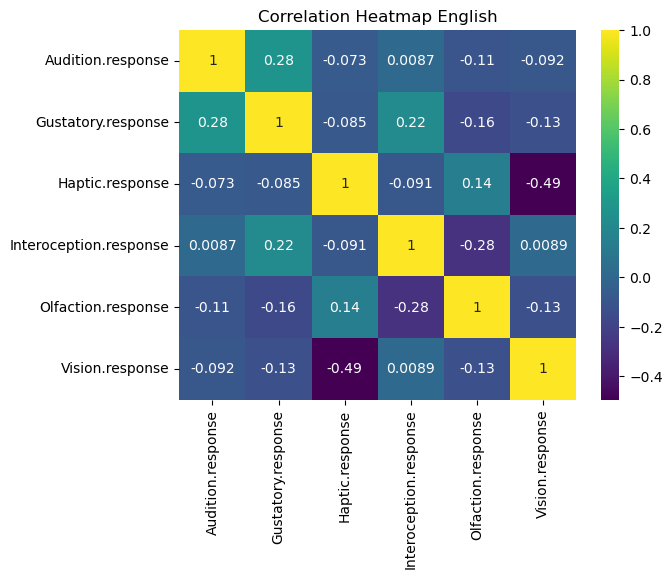

In [138]:
# Load your data (replace 'your_data.csv' with your actual file path)
Cant_take_the_heat = pd.read_csv('output_ENG.csv')

# Select the 6 columns for comparison
hot = ["Audition.response", "Gustatory.response", "Haptic.response", "Interoception.response", "Olfaction.response", "Vision.response"]
ice_ice_baby = combined_df[columns_to_compare]


# Create a heatmap of the correlations
too_sexy = Cant_take_the_heat[hot].corr()
sns.heatmap(too_sexy, annot=True, cmap='viridis')
plt.title('Correlation Heatmap English')
plt.show()

In [139]:
heat_SPAN_words = pd.read_csv('output_SPAN.csv').dropna()
heat_SPAN_words

,Unnamed: 0,Word,Audition.response,Gustatory.response,Haptic.response,Interoception.response,Olfaction.response,Vision.response
2,2,EMOCIONANTE,1.0,1.0,3.0,2.0,2.0,4.0
3,3,CUAJAR,4.0,3.0,3.0,3.0,2.0,2.0
4,4,DIA,1.0,2.0,1.0,3.0,2.0,4.0
5,5,A LA VISTA,4.0,3.0,2.0,4.0,2.0,4.0
6,6,SOBRESCRIBIR,3.0,2.0,3.0,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...
79,79,APRETÓN DE MANOS,3.0,3.0,2.0,2.0,2.0,2.0
80,80,IMÁGENES,1.0,2.0,1.0,3.0,2.0,4.0
81,81,CONSIGUIENTE,1.0,2.0,1.0,3.0,1.0,4.0
83,83,BRILLO,0.0,2.0,2.0,1.0,4.0,3.0


# 7. Saving files 

In [140]:
filename = 'Stimuli_master_selsction_3.csv'
combined_visual_haptic_df.to_csv(filename)

In [141]:
List_A  = combined_visual_haptic_df[combined_visual_haptic_df['mixed'] == 'visual']
List_B  = combined_visual_haptic_df[combined_visual_haptic_df['mixed'] == 'haptic']
List_C  = combined_visual_haptic_df[combined_visual_haptic_df['mixed'] == 'vh_low']
List_D  = combined_visual_haptic_df[combined_visual_haptic_df['mixed'] == 'vh_med']
len(List_A)

300

In [142]:
# Randomly shuffle the column
shuffled_list = combined_visual_haptic_df['Word'].sample(frac=1, random_state=8)

# Split the shuffled column into two parts (approximately half)
split_point = int(len(shuffled_list) / 2)
list_one = shuffled_list.iloc[:split_point]
list_two = shuffled_list.iloc[split_point:]

# Create a new DataFrame with the two parts
df_split = pd.DataFrame({'list_one': list_one, 'list_two': list_two})

list_one

656       FULFILL
40     SUNGLASSES
670      RAVENOUS
600      LOVELORN
106      LONGHAIR
          ...    
119    POWER LINE
531     BLASPHEMY
740      KNITTING
465      TOUCHPAD
138    SKYSCRAPER
Name: Word, Length: 450, dtype: object

In [143]:
filename = 'list_one.csv'
list_one.to_csv(filename)

In [144]:
filename = 'list_two.csv'
list_two.to_csv(filename)